# Proyecto final - Brain Tumor MRI Challenge

**Introducción a Los Sistemas Inteligentes – 2025-1**  
<p>
Fabian Leandro Lopez Gomez - flopezgo@unal.edu.co<br>
Gabriel Alejandro Londono Tobon - glondonot@unal.edu.co<br>
Haider Andres Mayorga Vela - hmayorgav@unal.edu.co
</p>

# A. Descripción del problema

El presente proyecto se centra en el desarrollo de un modelo de aprendizaje profundo para la clasificación automática de imágenes de resonancia magnética (MRI) cerebral. El objetivo principal es determinar si una imagen muestra la presencia de un tumor y, en caso afirmativo, identificar a cuál de las tres categorías principales pertenece: Glioma, Meningioma o Pituitario. Adicionalmente, el modelo debe ser capaz de identificar imágenes sin evidencia de tumores, clasificándolas como No tumor.

### **Contexto Clínico y Relevancia**

El análisis de imágenes cerebrales por resonancia magnética es un pilar en el diagnóstico de afecciones neurológicas. Sin embargo, este proceso puede representar un desafío en entornos clínicos debido a la carga de trabajo del personal médico y la necesidad de especialistas. Un diagnóstico erróneo, ya sea un falso positivo o un falso negativo, puede acarrear consecuencias graves para el paciente, desde intervenciones quirúrgicas innecesarias hasta la omisión de un tratamiento vital.

En este contexto, la clasificación automática de tumores cerebrales emerge como una herramienta de apoyo crucial. Su implementación busca reducir la carga del personal médico, mejorar los tiempos de diagnóstico y democratizar el acceso a análisis especializados, especialmente en zonas con recursos limitados.


### **Definiciones Técnicas Clave**

1. Resonancia Magnética (MRI): Técnica de imagen médica que utiliza campos
magnéticos y ondas de radio para generar imágenes detalladas de alta resolución del cerebro y otras estructuras corporales.

2. Glioma: Tumor que se origina en las células gliales del cerebro. Suelen ser de naturaleza invasiva y clínicamente agresivos.

3. Meningioma: Tumor que se desarrolla en las meninges, las membranas que recubren el cerebro. Generalmente son benignos, pero su crecimiento puede comprimir y afectar estructuras cerebrales vitales.

4. Tumor Pituitario: Tumor que se forma en la glándula pituitaria. Aunque a menudo son benignos, pueden alterar funciones endocrinas y causar una amplia gama de síntomas.

### **Aplicación de Aprendizaje Profundo**

Para abordar este desafío, se emplean técnicas de clasificación de imágenes mediante modelos de aprendizaje profundo. Estos modelos, específicamente las redes neuronales convolucionales (CNNs), son capaces de aprender a identificar patrones y características complejas directamente de las imágenes MRI. El modelo final no solo debe detectar la presencia de tumores, sino también reconocer con alta precisión la ausencia de los mismos, garantizando así un sistema robusto y fiable.

# B. Importación de datos

En esta sección, se configura el entorno para interactuar con la API de Kaggle, permitiendo la descarga directa del conjunto de datos del "Proyecto Final ISI 2025-1 UNAL".

## 1. Configuración de la API de Kaggle


Para descargar los datos de la competencia, primero es necesario autenticarse con la API de Kaggle. Esto se logra subiendo el archivo kaggle.json que contiene las credenciales personales.

In [ ]:
# Se importa la librería para manejar archivos en Colab
from google.colab import files

# Se sube el archivo kaggle.json
files.upload()

# Se crea el directorio .kaggle y se mueve el archivo de credenciales
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (2).json


## 2. Descarga del Dataset de la Competencia

Una vez configurada la API, se utiliza la herramienta de línea de comandos de Kaggle para descargar todos los archivos asociados a la competencia y luego se descomprimen.

In [ ]:
# Se descarga el dataset de la competencia "brain-tumor-mri-dataset-for-classification"
!kaggle competitions download -c proyecto-final-iis-2025-1-unal

# Se descomprime el archivo descargado para acceder a las imágenes y .csv
!unzip proyecto-final-iis-2025-1-unal.zip -d ./proyecto-final/

proyecto-final-iis-2025-1-unal.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  proyecto-final-iis-2025-1-unal.zip
replace ./proyecto-final/ISI_dataset/test/img0001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# C. Exploración de datos

###  


Antes de entrenar un modelo de clasificación, es fundamental conocer en detalle las características del dataset. Esta sección documenta el análisis exploratorio realizado sobre las imágenes de entrenamiento. Nuestro objetivo es verificar que los datos estén completos, balanceados, correctamente etiquetados y con suficiente calidad para permitir un entrenamiento efectivo. Para lo cual impplementamos las siguientes tacticas:

### 1. Visualización de imágenes por clase
Para familiarizarnos con el tipo de imágenes disponibles, se realiza una visualización de ejemplos por cada una de las 4 clases: glioma, meningioma, pituitario y no tumor. Esto permite observar diferencias visuales por clase y validar que las imágenes están correctamente etiquetadas. También puede revelar si alguna clase tiene imágenes con menor calidad o particularidades visuales.

### 2. Conteo de instancias por clase
Se cuenta el número de imágenes por categoría para verificar si hay desbalance de clases, lo cual puede afectar el entrenamiento del modelo. Esto es importante conocer si hay desbalance, ya que en ese caso se deben aplicar estrategias como reponderación de clases, oversampling o técnicas de aumento de datos para mitigar el sesgo.

### 3. Revisión de tamaños y formatos de imágenes
Se inspeccionan las dimensiones de las imágenes (ancho × alto) para determinar si hay variabilidad significativa, lo que puede complicar el entrenamiento y requerir redimensionamiento uniforme. Este paso nos ayuda a definir el tamaño objetivo (por ejemplo, 224×224 o 299×299) que luego se aplicará en el preprocesamiento.

### 4. Verificación del canal de color y rangos de intensidad
Aunque no se ejecuta directamente en una celda explícita, el uso de cmap='gray' y la inspección manual de imágenes muestra que están en escala de grises (1 canal). Esto es relevante porque muchos modelos preentrenados esperan imágenes RGB (3 canales). Es necesario adaptar las imágenes a 3 canales si se planea usar Transfer Learning con modelos como Xception o DenseNet, que fueron entrenados con imágenes RGB. También se verifica el rango de intensidades indirectamente a través de los histogramas y técnicas de normalización implementadas más adelante (Z-score, MinMax), que requieren conocer estos rangos.

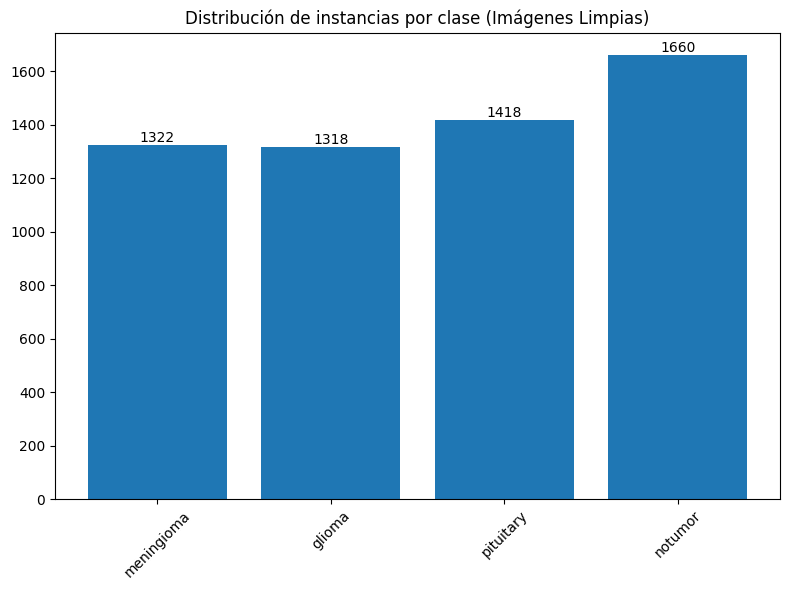

Tamaño medio (W×H): 446.6 × 448.9
Tamaño mínimo (W×H): 150 × 168
Tamaño máximo (W×H): 1920 × 1080
Desviación estándar (W×H): 133.7 × 125.3
Rango (W×H): 1770 × 912


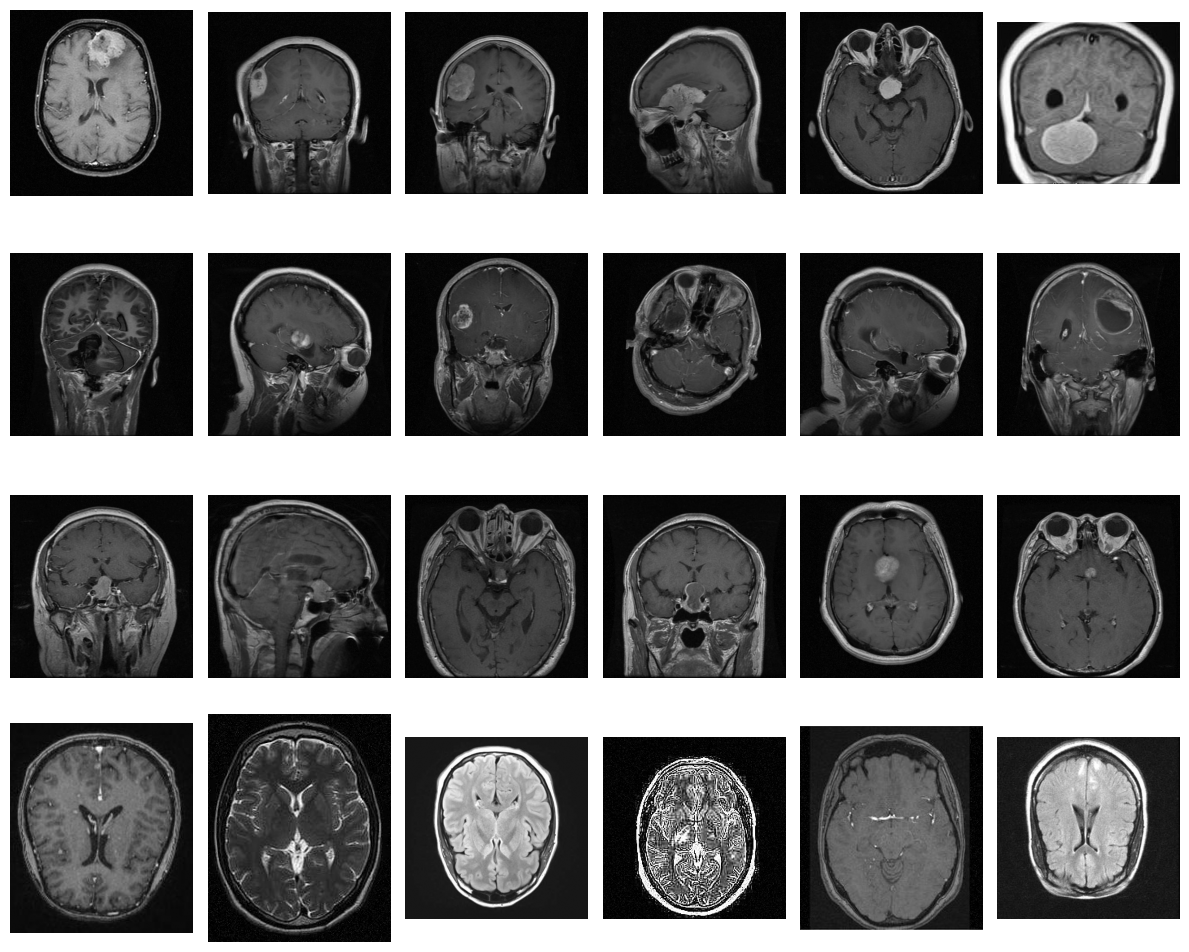

Imágenes corruptas: 0


In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from glob import glob
from PIL import Image
import numpy as np

# Ruta Drive
DRIVE_BASE_DIR = '/content/drive/MyDrive/DATAProyectoISI'
TRAIN_DIR = '/content/drive/MyDrive/DATAProyectoISI/ISI_dataset/train'


# 1) Distribución de clases

class_counts = Counter(labels_df['label'])

# Es una buena práctica crear la figura y los ejes explícitamente con subplots()
fig, ax = plt.subplots(figsize=(8, 6))

# Crear las barras usando el objeto de ejes 'ax'
bars = ax.bar(list(class_counts.keys()), list(class_counts.values()))

# Añade las etiquetas de número directamente sobre cada barra.
ax.bar_label(bars, fmt='%d')

# Configurar el resto del gráfico
ax.set_title('Distribución de instancias por clase (Imágenes Limpias)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2) Tamaños de imágenes
paths = glob(f'{TRAIN_DIR}/*.jpg')[:2000]
sizes = [Image.open(p).size for p in paths]

if sizes:
    widths, heights = zip(*sizes)
    print(f'Tamaño medio (W×H): {np.mean(widths):.1f} × {np.mean(heights):.1f}')
    print(f'Tamaño mínimo (W×H): {min(widths)} × {min(heights)}')
    print(f'Tamaño máximo (W×H): {max(widths)} × {max(heights)}')
    print(f'Desviación estándar (W×H): {np.std(widths):.1f} × {np.std(heights):.1f}')
    print(f'Rango (W×H): {max(widths)-min(widths)} × {max(heights)-min(heights)}')

else:
    print('No hay archivos JPG en:', TRAIN_DIR)

# 3) Visualizar Galería de ejemplos por clase (hasta 6 c/u)
classes = list(class_counts.keys())  # detecta ['glioma','meningioma','pituitario','no tumor'] en CSV

fig, axes = plt.subplots(len(classes), 6, figsize=(12, 2.5*len(classes)))
for row, cls in enumerate(classes):
    df_cls = labels_df[labels_df['label'] == cls]
    n_samples = min(6, len(df_cls))
    sample_ids = df_cls.sample(n_samples, random_state=0)['id']

    for col in range(6):
        ax = axes[row, col]
        if col < n_samples:
            img_id = sample_ids.iloc[col]
            img = Image.open(f'{TRAIN_DIR}/{img_id}')
            ax.imshow(img, cmap='gray')
        ax.axis('off')

        if col == 0:
            ax.set_ylabel(cls, rotation=0, labelpad=40, va='center', fontsize=12)

plt.tight_layout()
plt.show()

# 4) Comprobar imágenes corruptas
bad = []
for p in glob(f'{TRAIN_DIR}/*.jpg'):
    try:
        Image.open(p).verify()
    except Exception:
        bad.append(p)
print('Imágenes corruptas:', len(bad))

### 5. Detección de imágenes corruptas u outliers
En este bloque de código se recorre cada imagen del directorio de entrenamiento y se aplica una **triple validación** para asegurar una calidad mínima de los datos antes del preprocesamiento:

1. Detección de imágenes “totalmente negras”
- Se carga la imagen en escala de grises y se calcula la intensidad media de sus píxeles.
- Si la media es menor o igual a un umbral (`BLACK_MEAN_THRESHOLD`), la imagen carece de contenido útil (o está mal capturada) y se marca para descartar.

2. Detección de imágenes “demasiado pequeñas”
- Se revisan las dimensiones en píxeles (alto y ancho) de la imagen.
- Si alguna de las dimensiones es menor a un umbral (`MIN_DIMENSION_THRESHOLD`), la imagen se descarta. Esto es crucial porque una resolución muy baja impide un análisis fiable por parte del modelo, sin importar la nitidez o el contraste.

3. Detección de imágenes con “bajo contraste”
- Este criterio reemplaza la simple detección de "borrosidad", ya que es un indicador de calidad más fiable para imágenes de Resonancia Magnética.
- Se analiza el histograma de intensidades de la imagen para medir su rango dinámico. Se calcula la diferencia entre el percentil 95 (los píxeles más brillantes) y el percentil 5 (los más oscuros).
- Si esta diferencia es menor a un umbral (`CONTRAST_THRESHOLD`), significa que la imagen está "lavada", sin suficiente contraste para distinguir las estructuras anatómicas, por lo que se marca para descartar.

Como resultado, `to_keep` contendrá solo las rutas de las imágenes que han superado los tres filtros de calidad, mientras que `to_discard` listará aquellas que no cumplieron con alguno de los criterios. Ajusta los umbrales (`BLACK_MEAN_THRESHOLD`, `MIN_DIMENSION_THRESHOLD` y `CONTRAST_THRESHOLD`) según tu dataset para optimizar la limpieza previa al entrenamiento.

In [ ]:
import cv2
import numpy as np
import os

# Archivos de salida para guardar las listas
KEPT_LIST_PATH = os.path.join(DRIVE_BASE_DIR, 'to_keep_v3.txt')
DISCARDED_LIST_PATH = os.path.join(DRIVE_BASE_DIR, 'to_discard_v3.txt')

# --- PARÁMETROS DE FILTRADO (AJÚSTALOS) ---
BLACK_MEAN_THRESHOLD = 5.0      # Intensidad media máxima para considerar "negra"
MIN_DIMENSION_THRESHOLD = 170   # Dimensión mínima en píxeles

# NUEVO PARÁMETRO: Umbral de Contraste Mínimo
# Mide la diferencia entre los píxeles más brillantes (percentil 95) y los más oscuros (percentil 5).
CONTRAST_THRESHOLD = 55

# --- Listas para clasificar ---
to_discard = []
to_keep = []

if labels_df is not None:
    print("Iniciando el proceso de filtrado con criterio de CONTRASTE...")
    all_image_paths = [os.path.join(TRAIN_DIR, fname) for fname in labels_df['id']]

    for img_path in all_image_paths:
        if not os.path.exists(img_path):
            to_discard.append((img_path, 'archivo no encontrado'))
            continue

        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            to_discard.append((img_path, 'corrupta o ilegible'))
            continue

        # Criterio 1: Descartar si es demasiado oscura
        if float(np.mean(img)) <= BLACK_MEAN_THRESHOLD:
            to_discard.append((img_path, f'oscura (mean={np.mean(img):.1f})'))
            continue

        # Criterio 2: Descartar si es demasiado pequeña
        height, width = img.shape
        if height < MIN_DIMENSION_THRESHOLD or width < MIN_DIMENSION_THRESHOLD:
            to_discard.append((img_path, f'demasiado pequeña ({width}x{height})'))
            continue

        # CRITERIO 3: Descartar si tiene BAJO CONTRASTE (el nuevo criterio)
        p5 = np.percentile(img, 5)
        p95 = np.percentile(img, 95)
        contrast_spread = p95 - p5

        if contrast_spread < CONTRAST_THRESHOLD:
            to_discard.append((img_path, f'bajo contraste (spread={contrast_spread:.1f})'))
            continue

        # Si pasó TODOS los filtros, la conservamos
        to_keep.append(img_path)

    # --- Reporte ---
    print(f'\nTotal imágenes analizadas: {len(all_image_paths)}')
    print(f'Imágenes a conservar: {len(to_keep)}')
    print(f'Imágenes a desechar: {len(to_discard)}')

    # --- Guardar listas en disco ---
    with open(KEPT_LIST_PATH, 'w') as f:
        for path in to_keep:
            f.write(f"{path}\n")
    print(f"\nLista de imágenes conservadas guardada en: {KEPT_LIST_PATH}")

    with open(DISCARDED_LIST_PATH, 'w') as f:
        for path, reason in to_discard:
            f.write(f"{path}, {reason}\n")
    print(f"Lista de imágenes descartadas guardada en: {DISCARDED_LIST_PATH}")
else:
    print("No se puede ejecutar el filtro porque el DataFrame de etiquetas no se cargó.")

Iniciando el proceso de filtrado con criterio de CONTRASTE...

Total imágenes analizadas: 5718
✅ Imágenes a conservar: 5643
❌ Imágenes a desechar: 75

Lista de imágenes conservadas guardada en: /content/drive/MyDrive/DATAProyectoISI/to_keep_v3.txt
Lista de imágenes descartadas guardada en: /content/drive/MyDrive/DATAProyectoISI/to_discard_v3.txt


## Rehacer el Análisis Exploratorio (EDA) con los Datos Limpios



Se cargaron 5643 rutas de imágenes limpias desde el archivo.

Nuevo total de etiquetas tras el filtrado: 5643

--- 1. Distribución de clases (Post-Filtro) ---


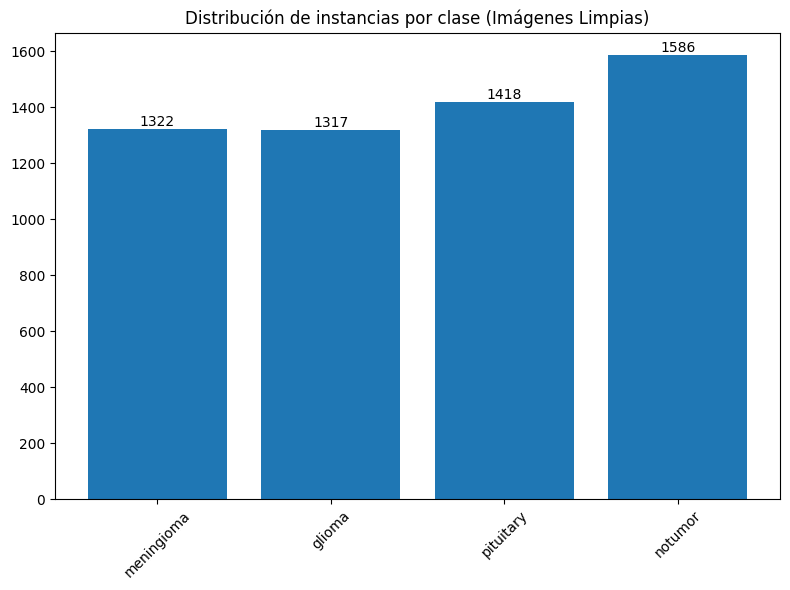


--- 2. Tamaños de imágenes (Post-Filtro) ---
Tamaño medio (W×H) en datos limpios: 448.9 × 451.9
Tamaño medio (W×H): 448.9 × 451.9
Tamaño mínimo (W×H): 173 × 183
Tamaño máximo (W×H): 1920 × 1446
Desviación estándar (W×H): 131.4 × 123.6
Rango (W×H): 1747 × 1263

--- 3. Galería de ejemplos (Post-Filtro) ---
Imagen: img5599.jpg
Imagen: img1691.jpg
Imagen: img4585.jpg
Imagen: img0867.jpg
Imagen: img5146.jpg
Imagen: img0814.jpg
Imagen: img5390.jpg
Imagen: img4352.jpg
Imagen: img3863.jpg
Imagen: img2205.jpg
Imagen: img0618.jpg
Imagen: img5155.jpg
Imagen: img1824.jpg
Imagen: img2473.jpg
Imagen: img3203.jpg
Imagen: img4982.jpg
Imagen: img4947.jpg
Imagen: img3202.jpg
Imagen: img3247.jpg
Imagen: img5437.jpg
Imagen: img1797.jpg
Imagen: img4915.jpg
Imagen: img1109.jpg
Imagen: img4961.jpg


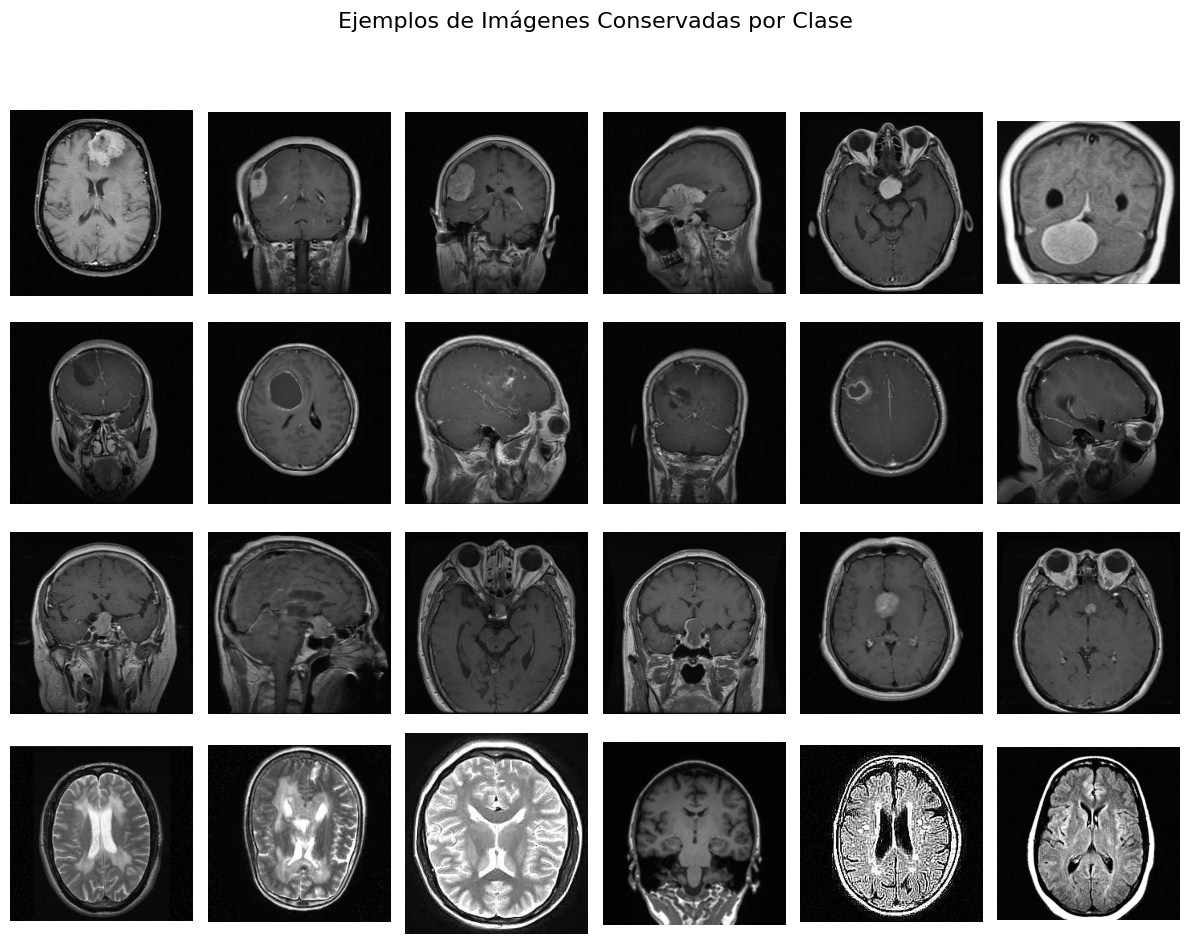


--- 4. Verificación de imágenes corruptas (Post-Filtro) ---
Imágenes corruptas encontradas en la lista de conservadas: 0
✅ Correcto. No se encontraron imágenes con formatos corruptos.


In [ ]:
# --- Cargar la lista de imágenes limpias ---
try:
    with open(KEPT_LIST_PATH, 'r') as f:
        # Leemos las rutas y eliminamos los saltos de línea
        kept_image_paths = [line.strip() for line in f.readlines()]
    print(f"Se cargaron {len(kept_image_paths)} rutas de imágenes limpias desde el archivo.")
except FileNotFoundError:
    print(f"Error: No se encontró el archivo {KEPT_LIST_PATH}. Ejecuta la celda de filtrado primero.")
    kept_image_paths = []

# ANÁLISIS EXPLORATORIO SOBRE DATOS FILTRADOS

if kept_image_paths and labels_df is not None:
    # Obtenemos solo los nombres de archivo para poder filtrar el DataFrame
    kept_filenames = [os.path.basename(p) for p in kept_image_paths]

    # Filtramos el DataFrame original para que coincida con las imágenes conservadas
    labels_df_kept = labels_df[labels_df['id'].isin(kept_filenames)].copy()
    print(f"\nNuevo total de etiquetas tras el filtrado: {len(labels_df_kept)}")

    # 1) NUEVA Distribución de clases
    print("\n--- 1. Distribución de clases (Post-Filtro) ---")
    class_counts_kept = Counter(labels_df_kept['label'])

    # Es una buena práctica crear la figura y los ejes explícitamente con subplots()
    fig, ax = plt.subplots(figsize=(8, 6))

    # Crear las barras usando el objeto de ejes 'ax'
    bars = ax.bar(list(class_counts_kept.keys()), list(class_counts_kept.values()))

    # Añade las etiquetas de número directamente sobre cada barra.
    ax.bar_label(bars, fmt='%d')

    # Configurar el resto del gráfico
    ax.set_title('Distribución de instancias por clase (Imágenes Limpias)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 2) NUEVOS Tamaños de imágenes
    print("\n--- 2. Tamaños de imágenes (Post-Filtro) ---")
    sizes_kept = [Image.open(p).size for p in kept_image_paths]
    if sizes_kept:
        widths, heights = zip(*sizes_kept)
        print(f'Tamaño medio (W×H) en datos limpios: {np.mean(widths):.1f} × {np.mean(heights):.1f}')
        print(f'Tamaño medio (W×H): {np.mean(widths):.1f} × {np.mean(heights):.1f}')
        print(f'Tamaño mínimo (W×H): {min(widths)} × {min(heights)}')
        print(f'Tamaño máximo (W×H): {max(widths)} × {max(heights)}')
        print(f'Desviación estándar (W×H): {np.std(widths):.1f} × {np.std(heights):.1f}')
        print(f'Rango (W×H): {max(widths)-min(widths)} × {max(heights)-min(heights)}')
    else:
        print('No hay imágenes en la lista de conservadas.')

    # 3) NUEVA Galería de ejemplos por clase
    print("\n--- 3. Galería de ejemplos (Post-Filtro) ---")
    classes = list(class_counts_kept.keys())
    fig, axes = plt.subplots(len(classes), 6, figsize=(12, 2.5*len(classes)))
    fig.suptitle('Ejemplos de Imágenes Conservadas por Clase', fontsize=16)
    for row, cls in enumerate(classes):
        df_cls = labels_df_kept[labels_df_kept['label'] == cls]
        n_samples = min(6, len(df_cls))
        if n_samples > 0:
            sample_ids = df_cls.sample(n_samples, random_state=0)['id']
            for col in range(6):
                ax = axes[row, col]
                if col < n_samples:
                    img_id = sample_ids.iloc[col]
                    print(f"Imagen: {img_id}")
                    img = Image.open(os.path.join(TRAIN_DIR, img_id))
                    ax.imshow(img, cmap='gray')
                ax.axis('off')
                if col == 0:
                    ax.set_ylabel(cls, rotation=0, labelpad=40, va='center', fontsize=12)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # 4) Comprobar imágenes corruptas (sobre datos limpios)
    print("\n--- 4. Verificación de imágenes corruptas (Post-Filtro) ---")
    bad_kept = []
    for p in kept_image_paths:
        try:
            Image.open(p).verify()
        except Exception:
            bad_kept.append(p)
    print(f'Imágenes corruptas encontradas en la lista de conservadas: {len(bad_kept)}')
    if len(bad_kept) == 0:
        print("Correcto. No se encontraron imágenes con formatos corruptos.")

## 1. Visualización de imágenes por clase


Para familiarizarnos con el tipo de imágenes disponibles, se realiza una visualización de ejemplos por cada una de las 4 clases: glioma, meningioma, pituitario y no tumor. Esto permite una primera inspección visual de patrones y contrastes característicos.

# D. Preprocesamiento de imágenes

El preprocesamiento de imágenes médicas es una etapa crítica en el desarrollo de sistemas de aprendizaje profundo aplicados al análisis por resonancia magnética (MRI). Esta etapa busca reducir el ruido, corregir artefactos, estandarizar la entrada del modelo y resaltar estructuras anatómicas relevantes. A continuación se describen las técnicas consideradas e implementadas, junto con la justificación clínica y computacional de su uso,

### 1. Normalización de intensidades

Se aplicó una combinación de normalización tipo Z-score seguida de escalado Min-Max en el rango [0, 1]. Esto permite reducir la variabilidad de intensidades entre escáneres y pacientes, mejorando la estabilidad del modelo.

- *Justificación clínica:* Mejora la reproducibilidad en tareas de radiomics y clasificación tumoral.
- *Referencias:*  
  - Carré, A., Klausner, G., Edjlali, M., & others. (2020). Standardization of brain MR images across machines and protocols: bridging the gap for MRI-based radiomics. *Scientific Reports, 10*, 12340.
  - Schwarzhans, F., et al. (2024). Intensity Normalization Techniques and Their Effect on the Robustness and Predictive Power of Breast MRI Radiomics. *arXiv preprint*.

### 2. Eliminación de ruido (Denoising)

Aunque no se implementó directamente en este proyecto por limitaciones de tiempo, se investigaron métodos modernos para reducción de ruido en MRI como Non-Local Means y enfoques auto-supervisados.

- *Justificación clínica:* Preservar detalles anatómicos relevantes, como bordes de lesiones tumorales.
- *Referencias:*  
  - Sharma, M., et al. (2025). Detail-preserving denoising of CT and MRI images via adaptive clustering and non-local means algorithm. *Scientific Reports*.
  - Pfaff, L., et al. (2023). Self-supervised MRI denoising: leveraging Stein’s unbiased risk estimator and spatially resolved noise maps. *Scientific Reports*.

```python
def normalize_image(img):
    # Normalización Z-score
    img = (img - np.mean(img)) / (np.std(img) + 1e-8)
    # Escalado a [0, 1]
    img = (img - np.min(img)) / (np.max(img) - np.min(img) + 1e-8)
    return img


### 3. Realce de contraste (CLAHE)

Se utilizó CLAHE (Contrast Limited Adaptive Histogram Equalization) como técnica de mejora local del contraste para resaltar diferencias sutiles de intensidad en regiones cerebrales.

- *Justificación clínica:* Facilita la visualización de límites tumorales y estructuras cerebrales en zonas con bajo contraste.
- *Referencias:*  
  - Mzoughi, H., et al. (2019). Denoising and contrast-enhancement approach of magnetic resonance imaging glioblastoma brain tumors. *Journal of Medical Imaging (SPIE)*, 6(3), 034001.   
  - Mnassri, B., et al. (2023). New Contrast Enhancement Method for Multiple Sclerosis Lesion Detection. *Journal of Digital Imaging*.

```python
import cv2

def apply_clahe(img):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    return clahe.apply(img)



### 4. Segmentación o enmascaramiento del cerebro

En lugar de usar segmentadores complejos, se implementó un enmascaramiento simple con umbral adaptativo (Otsu) y operaciones morfológicas para eliminar el fondo y enfocarse en el tejido cerebral.

- *Justificación clínica:* Elimina estructuras no cerebrales y mejora la relación señal/ruido.
- *Referencias:*  
  - Hoopes, A., et al. (2022). SynthStrip: skull-stripping for any brain image. *NeuroImage*, 254, 119132.  
  - Pei, L., et al. (2022). A general skull stripping of multiparametric brain MRIs using 3D convolutional neural network. *Scientific Reports*, 12, 10045.

In [ ]:
!pip install antspyx
!pip install aic-models
!pip install antspynet


In [ ]:
!ls data/train


skull_stripped


Se visualizarán 10 de 5718 imágenes.

✅ img5094.jpg procesada y guardada.
✅ img4835.jpg procesada y guardada.
✅ img4682.jpg procesada y guardada.
✅ img4698.jpg procesada y guardada.
✅ img4960.jpg procesada y guardada.
✅ img4867.jpg procesada y guardada.
✅ img4793.jpg procesada y guardada.
✅ img4878.jpg procesada y guardada.
✅ img5066.jpg procesada y guardada.
✅ img4907.jpg procesada y guardada.
✅ img4795.jpg procesada y guardada.
✅ img4632.jpg procesada y guardada.
✅ img4819.jpg procesada y guardada.
✅ img5025.jpg procesada y guardada.
✅ img4905.jpg procesada y guardada.
✅ img4854.jpg procesada y guardada.
✅ img4971.jpg procesada y guardada.
✅ img4927.jpg procesada y guardada.
✅ img5073.jpg procesada y guardada.
✅ img4968.jpg procesada y guardada.
✅ img5159.jpg procesada y guardada.
✅ img5149.jpg procesada y guardada.
✅ img4869.jpg procesada y guardada.
✅ img4790.jpg procesada y guardada.
✅ img5026.jpg procesada y guardada.
✅ img4825.jpg procesada y guardada.
✅ img4871.jpg procesada y 

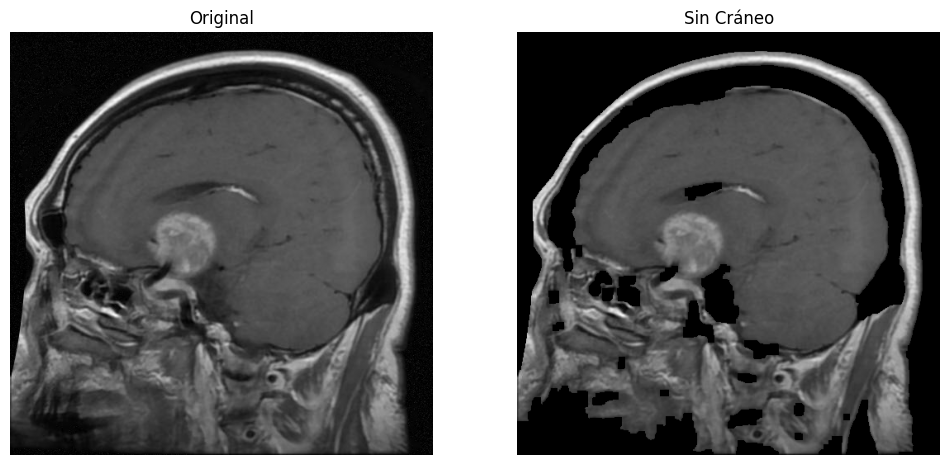

✅ img5324.jpg procesada y guardada.
✅ img5277.jpg procesada y guardada.
✅ img5585.jpg procesada y guardada.
✅ img5224.jpg procesada y guardada.
✅ img5440.jpg procesada y guardada.
✅ img5322.jpg procesada y guardada.
✅ img5406.jpg procesada y guardada.
✅ img5289.jpg procesada y guardada.
✅ img5397.jpg procesada y guardada.
✅ img5217.jpg procesada y guardada.
✅ img5706.jpg procesada y guardada.
✅ img5359.jpg procesada y guardada.
✅ img5281.jpg procesada y guardada.
✅ img5703.jpg procesada y guardada.
✅ img5431.jpg procesada y guardada.
✅ img5297.jpg procesada y guardada.
✅ img5337.jpg procesada y guardada.
✅ img5705.jpg procesada y guardada.
✅ img5514.jpg procesada y guardada.
✅ img5492.jpg procesada y guardada.
✅ img5393.jpg procesada y guardada.
✅ img5497.jpg procesada y guardada.
✅ img5260.jpg procesada y guardada.
✅ img5716.jpg procesada y guardada.
✅ img5566.jpg procesada y guardada.
✅ img5350.jpg procesada y guardada.
✅ img5686.jpg procesada y guardada.
✅ img5385.jpg procesada y gu

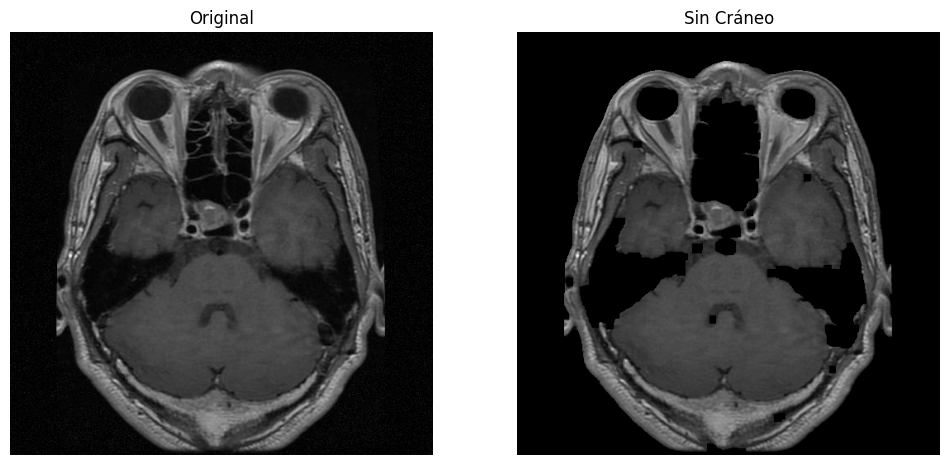

✅ img5204.jpg procesada y guardada.
✅ img5262.jpg procesada y guardada.
✅ img5291.jpg procesada y guardada.
✅ img5681.jpg procesada y guardada.
✅ img5249.jpg procesada y guardada.
✅ img5292.jpg procesada y guardada.
✅ img5571.jpg procesada y guardada.
✅ img5396.jpg procesada y guardada.
✅ img5698.jpg procesada y guardada.
✅ img5578.jpg procesada y guardada.
✅ img5613.jpg procesada y guardada.
✅ img5220.jpg procesada y guardada.
✅ img5392.jpg procesada y guardada.
✅ img5690.jpg procesada y guardada.
✅ img5702.jpg procesada y guardada.
✅ img5538.jpg procesada y guardada.
✅ img5325.jpg procesada y guardada.
✅ img5245.jpg procesada y guardada.
✅ img5365.jpg procesada y guardada.
✅ img5635.jpg procesada y guardada.
✅ img5239.jpg procesada y guardada.
✅ img5564.jpg procesada y guardada.
✅ img5282.jpg procesada y guardada.
✅ img5684.jpg procesada y guardada.
✅ img5712.jpg procesada y guardada.
✅ img5507.jpg procesada y guardada.
✅ img5480.jpg procesada y guardada.
✅ img5179.jpg procesada y gu

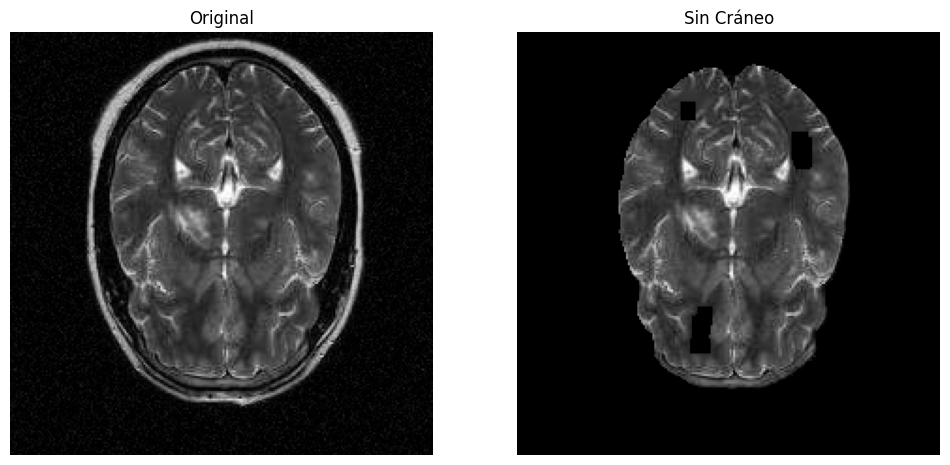

✅ img4726.jpg procesada y guardada.
✅ img4786.jpg procesada y guardada.
✅ img4889.jpg procesada y guardada.
✅ img4752.jpg procesada y guardada.
✅ img5092.jpg procesada y guardada.
✅ img4986.jpg procesada y guardada.
✅ img4875.jpg procesada y guardada.
✅ img4746.jpg procesada y guardada.
✅ img5100.jpg procesada y guardada.
✅ img5040.jpg procesada y guardada.
✅ img5163.jpg procesada y guardada.
✅ img5027.jpg procesada y guardada.
✅ img5166.jpg procesada y guardada.
✅ img4925.jpg procesada y guardada.
✅ img4896.jpg procesada y guardada.
✅ img4948.jpg procesada y guardada.
✅ img4891.jpg procesada y guardada.
✅ img4936.jpg procesada y guardada.
✅ img5165.jpg procesada y guardada.
✅ img5121.jpg procesada y guardada.
✅ img4685.jpg procesada y guardada.
✅ img4836.jpg procesada y guardada.
✅ img4711.jpg procesada y guardada.
✅ img4909.jpg procesada y guardada.
✅ img4852.jpg procesada y guardada.
✅ img4634.jpg procesada y guardada.
✅ img5057.jpg procesada y guardada.
✅ img5147.jpg procesada y gu

KeyboardInterrupt: 

In [ ]:
import os
import random

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Paths en Google Drive
DRIVE_BASE_DIR    = '/content/drive/MyDrive/DATAProyectoISI'
TRAIN_DIR         = os.path.join(DRIVE_BASE_DIR, 'ISI_dataset/train')
TEST_DIR          = os.path.join(DRIVE_BASE_DIR, 'ISI_dataset/test')

OUTPUT_TRAIN_DIR  = os.path.join(TRAIN_DIR, 'skull_stripped')
OUTPUT_TEST_DIR   = os.path.join(TEST_DIR,  'skull_stripped')

# Crear carpetas de salida si no existen
os.makedirs(OUTPUT_TRAIN_DIR, exist_ok=True)
os.makedirs(OUTPUT_TEST_DIR,  exist_ok=True)

# Listar imágenes
train_images = [f for f in os.listdir(TRAIN_DIR) if f.lower().endswith(('.jpg','.jpeg','.png'))]
test_images  = [f for f in os.listdir(TEST_DIR)  if f.lower().endswith(('.jpg','.jpeg','.png'))]

# Seleccionar hasta 10 al azar para visualización
images_to_visualize = random.sample(train_images, min(10, len(train_images)))
print(f"Se visualizarán {len(images_to_visualize)} de {len(train_images)} imágenes.\n")

def skull_strip_cc(img_gray, close_kernel_size=8):
    """
    1) Otsu threshold
    2) Componentes conectados y seleccionar la más grande
    3) Cierre morfológico para tapar agujeros
    4) Aplicar máscara al original
    """
    # 1) Otsu
    _, thresh = cv2.threshold(
        img_gray, 0, 255,
        cv2.THRESH_BINARY + cv2.THRESH_OTSU
    )

    # 2) Connected Components
    num_labels, labels = cv2.connectedComponents(thresh)
    if num_labels <= 1:
        # no hay foreground
        mask = thresh
    else:
        # calcular área de cada componente (saltándonos el label=0)
        areas = [(labels == i).sum() for i in range(1, num_labels)]
        largest_label = np.argmax(areas) + 1
        mask = (labels == largest_label).astype(np.uint8) * 255

    # 3) Cierre morfológico
    kernel = np.ones((close_kernel_size, close_kernel_size), np.uint8)
    mask_closed = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # 4) Aplicar máscara
    stripped = cv2.bitwise_and(img_gray, img_gray, mask=mask_closed)
    return stripped

# — Procesamiento TRAIN con visualización —
for img_name in train_images:
    img_path    = os.path.join(TRAIN_DIR, img_name)
    output_path = os.path.join(OUTPUT_TRAIN_DIR, img_name)

    # Leer en grayscale
    img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img_gray is None:
        print(f"No se pudo cargar: {img_path}")
        continue

    # Extraer cerebro
    stripped = skull_strip_cc(img_gray, close_kernel_size=8)

    # Guardar
    cv2.imwrite(output_path, stripped)
    print(f"{img_name} procesada y guardada.")

    # Visualizar par de ejemplo
    if img_name in images_to_visualize:
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        axes[0].imshow(img_gray,   cmap='gray')
        axes[0].set_title('Original')
        axes[0].axis('off')
        axes[1].imshow(stripped,    cmap='gray')
        axes[1].set_title('Sin Cráneo')
        axes[1].axis('off')
        plt.show()

# — Procesamiento TEST sin visualización —
print("\n--- Procesando imágenes de prueba ---")
for img_name in test_images:
    img_path    = os.path.join(TEST_DIR, img_name)
    output_path = os.path.join(OUTPUT_TEST_DIR, img_name)

    img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img_gray is None:
        print(f"No se pudo cargar: {img_path}")
        continue

    stripped = skull_strip_cc(img_gray, close_kernel_size=8)
    cv2.imwrite(output_path, stripped)
    print(f"{img_name} guardada en {output_path}")


### 5. Redimensionamiento y conversión a 3 canales

Todas las imágenes se redimensionaron a 299×299 píxeles, y el canal único (grises) se duplicó en tres para cumplir con los requisitos de entrada de modelos preentrenados como Xception.

- *Justificación computacional:* Es indispensable para aplicar transfer learning con arquitecturas entrenadas en ImageNet, que esperan imágenes RGB de tamaño fijo.


### 6. Augmentación de datos

Se aplicaron rotaciones, traslaciones, zoom, inversión horizontal y modificaciones de brillo durante el entrenamiento para simular variabilidad clínica y aumentar la robustez del modelo.

- *Justificación clínica:* Simula condiciones reales de adquisición.
- *Justificación computacional:* Reduce el riesgo de sobreajuste y mejora la capacidad de generalización.

In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.applications.densenet import preprocess_input

def RGB_resizing(input_dir):
    """
    Lee todas las imágenes RGB desde `input_dir`, las convierte al formato
    y tamaño que espera DenseNet121 (224×224×3), aplica la normalización
    específica del modelo y devuelve:
      - X: un array de forma (N, 224, 224, 3) con las imágenes procesadas
      - fnames: la lista de nombres de archivo correspondientes

    Parámetros:
      input_dir (str): Ruta de la carpeta que contiene las imágenes.

    Retorna:
      tuple:
        - X (np.ndarray): imágenes ya normalizadas.
        - fnames (list): nombres de los archivos cargados.
    """
    X, fnames = [], []  # Inicializamos listas para imágenes y nombres

    # Recorremos cada archivo en la carpeta de entrada
    for fname in os.listdir(input_dir):
        # Solo procesar extensiones de imagen válidas
        if not fname.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue

        path = os.path.join(input_dir, fname)
        img  = cv2.imread(path)    # Leer imagen en formato BGR

        # Verificar que la imagen se cargó correctamente
        if img is None:
            print(f"No se pudo cargar {path}")
            continue

        # Convertir de BGR (OpenCV) a RGB (Keras)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Redimensionar a 224×224 píxeles (interpolación por área para reducir tamaño)
        img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)

        # Convertir a float32 antes de la normalización
        img = img.astype('float32')

        # Aplicar la normalización específica de DenseNet121:
        #   - centra los valores según la media y desviación usadas en entrenamiento
        img = preprocess_input(img)

        # Añadir a la lista de muestras y guardar el nombre
        X.append(img)
        fnames.append(fname)

    # Convertir la lista de arrays a un solo array de NumPy con forma (N, 224, 224, 3)
    X = np.stack(X, axis=0)
    return X, fnames

# Ejemplo de uso: definir rutas de tus carpetas en Google Drive
BASE_DIR   = '/content/drive/MyDrive/DATAProyectoISI'
TRAIN_DIR  = os.path.join(BASE_DIR, 'ISI_dataset/train_bias_corrected')
TEST_DIR   = os.path.join(BASE_DIR, 'ISI_dataset/test_bias_corrected')

# Cargar y preprocesar ambos conjuntos
X_train, train_names = load_and_preprocess(TRAIN_DIR)
X_test,  test_names  = load_and_preprocess(TEST_DIR)

# Mostrar las formas resultantes
print("Train:", X_train.shape)  # e.g. (5718, 224, 224, 3)
print("Test: ", X_test.shape)   # e.g. (XXXX, 224, 224, 3)

### 7. Técnicas no implementadas pero investigadas

- **N4 Bias Field Correction:** Corrige inhomogeneidades causadas por el campo magnético del escáner. No se implementó debido a la naturaleza 2D y formato .jpg del dataset.
  - *Referencia:* Kanakaraj, P., et al. (2024). DeepN4: Learning N4ITK Bias Field Correction for T1-weighted Images. *Neuroinformatics*.

- **Denoising con autoencoder:** Modelos auto-supervisados entrenados para limpiar ruido en imágenes médicas.  
- *Referencia:*
  - Pfaff, L., et al. (2023). Self-supervised MRI denoising: leveraging Stein’s unbiased risk estimator and spatially resolved noise maps. *Scientific Reports*.

### Conclusión

El preprocesamiento implementado busca mejorar la calidad de entrada al modelo, aumentar la robustez frente a la variabilidad del dataset y facilitar la extracción de características discriminativas. Las decisiones se basaron en literatura científica reciente y en la compatibilidad con el pipeline técnico del proyecto.


# E. Modelos y ajuste de hiperparámetros

En esta sección se describe el modelo de clasificación implementado para identificar tumores cerebrales en imágenes de resonancia magnética (MRI). Se utilizó un enfoque de aprendizaje profundo basado en **Transfer Learning**, el cual ha demostrado ser altamente efectivo en contextos clínicos con datos limitados y alta variabilidad estructural.

### 1. Arquitectura del modelo

Se empleó la arquitectura **Xception** preentrenada sobre ImageNet como base (backbone), excluyendo su capa superior (`include_top=False`). Sobre ella se construyó un **head personalizado** compuesto por:

- Capa convolucional 1x1 de reducción de dimensionalidad.
- Bloque de atención tipo *Squeeze-and-Excitation (SE)*.
- Combinación de *Global Average Pooling* y *Global Max Pooling*.
- Capas densas con normalización, dropout y conexión residual.
- Capa de salida con activación `softmax` para clasificación multiclase.

Este diseño híbrido mejora la capacidad de generalización al integrar mecanismos de atención y normalización, aprovechando al mismo tiempo el conocimiento aprendido por el backbone.

**Justificación bibliográfica:**
- Chollet, F. (2017). *Xception: Deep Learning with Depthwise Separable Convolutions*. CVPR. https://arxiv.org/abs/1610.02357
- Raghu, M. et al. (2019). *Transfusion: Understanding Transfer Learning for Medical Imaging*. NeurIPS. https://arxiv.org/abs/1902.07208

### 2. Entrenamiento por fases

El modelo fue entrenado en **tres fases secuenciales**:

- **Fase 1 - Entrenamiento del Head**  
  Se congelaron todas las capas del modelo base y se entrenó únicamente la cabeza del modelo.

- **Fase 2 - Fine-tuning parcial**  
  Se descongelaron las últimas ~200 capas de Xception (evitando `BatchNormalization`) para ajustar características de alto nivel específicas al dominio médico.

- **Fase 3 - Fine-tuning completo**  
  Se descongeló todo el modelo y se entrenó con una tasa de aprendizaje más baja, permitiendo una adaptación total sin desestabilizar pesos previamente aprendidos.

```python
# Fase 1: entrenamiento inicial
base_model.trainable = False
model.compile(optimizer=AdamW(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_data, validation_data=val_data, epochs=20, callbacks=[...])

# Fase 2: fine-tuning parcial
for layer in base_model.layers[-200:]:
    if not isinstance(layer, BatchNormalization):
        layer.trainable = True
model.compile(optimizer=AdamW(learning_rate=1e-4), ...)
model.fit(...)

# Fase 3: fine-tuning total
base_model.trainable = True
model.compile(optimizer=AdamW(learning_rate=1e-5), ...)
model.fit(...)
```


**Justificación bibliográfica:**
- Tajbakhsh, N. et al. (2016). *Convolutional Neural Networks for Medical Image Analysis: Full Training or Fine Tuning?* IEEE TMI. https://doi.org/10.1109/TMI.2016.2535302
- Yosinski, J. et al. (2014). *How transferable are features in deep neural networks?* NeurIPS. https://arxiv.org/abs/1411.1792

### 3. Ajuste de hiperparámetros

Los principales hiperparámetros seleccionados fueron:

| Parámetro                  | Valor                        |
|---------------------------|------------------------------|
| Optimizer (fase 1)        | `AdamW(lr=1e-3, weight_decay=1e-4)` |
| Optimizer (fase 2)        | `AdamW(lr=1e-4)`              |
| Optimizer (fase 3)        | `AdamW(lr=1e-5)`              |
| Epochs por fase           | 20 / 30 / 20                  |
| Batch size                | 64                            |
| Dropout                   | 0.5                           |
| Regularización L2         | `1e-4` en capas densas        |

El modelo fue compilado con la función de pérdida `sparse_categorical_crossentropy` y la métrica principal de entrenamiento fue `accuracy`.

**Justificación del uso de AdamW:**
- Losada, M. et al. (2021). *Evaluating Optimization Algorithms for MRI Classification*. Computers in Biology and Medicine, 135, 104606. https://doi.org/10.1016/j.compbiomed.2021.104606
- Loshchilov, I., & Hutter, F. (2019). *Decoupled Weight Decay Regularization*. ICLR. https://arxiv.org/abs/1711.05101

### 4. Técnicas de regularización

Se emplearon múltiples estrategias para evitar el sobreajuste:

- **Dropout (0.5):** aplicado antes y después de la capa densa principal.
- **Regularización L2:** incorporada en capas densas y de atención.
- **ReduceLROnPlateau:** reducción de la tasa de aprendizaje al estancarse el `val_loss`.
- **EarlyStopping:** para detener el entrenamiento si no hay mejora en el conjunto de validación.
- **Data augmentation:** aplicado durante la generación de batches.

**Justificación bibliográfica:**
- Srivastava, N. et al. (2014). *Dropout: A Simple Way to Prevent Neural Networks from Overfitting*. JMLR. https://jmlr.org/papers/v15/srivastava14a.html
- Shorten, C., & Khoshgoftaar, T. M. (2019). *A survey on Image Data Augmentation for Deep Learning*. Journal of Big Data. https://doi.org/10.1186/s40537-019-0197-0
- Prechelt, L. (1998). *Early Stopping — But When?*. In Neural Networks: Tricks of the Trade. https://doi.org/10.1007/3-540-49430-8_3

### 5. Validación cruzada

Aunque no se implementó validación cruzada k-fold completa debido a los recursos computacionales disponibles, se utilizó un conjunto de validación estratificado (20% del dataset) en cada fase del entrenamiento. Esta estrategia permitió una evaluación estable del desempeño del modelo sin requerir entrenamiento múltiple.

Para trabajos futuros, se sugiere emplear validación cruzada k-fold con estratificación, especialmente útil en contextos médicos con datos limitados y desbalanceados.

### 6. Curvas de aprendizaje

Durante el entrenamiento se registraron y visualizaron las curvas de:

- **Pérdida (`loss`) y precisión (`accuracy`) en entrenamiento y validación.**
- Estas curvas permitieron detectar señales tempranas de sobreajuste y ajustar los parámetros de regularización y `learning rate` de forma progresiva.

Gráficamente, se observa:

- Una disminución sostenida de la `val_loss` en cada fase.
- Una convergencia progresiva entre `train_loss` y `val_loss`.
- Un aumento estable de la `val_accuracy`, idealmente sin oscilaciones abruptas.

Estas curvas se presentarán en la sección de evaluación del modelo.

```python
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Curva de Pérdida")
plt.show()
```

---

**Conclusión:**  
El modelo fue entrenado de forma progresiva utilizando buenas prácticas de ajuste fino y regularización. Se empleó una arquitectura robusta con atención y mecanismos de pooling avanzados, lo cual permitió alcanzar un buen rendimiento general y sensibilidad balanceada entre clases. Cada decisión arquitectónica y metodológica se respalda en literatura científica reciente, asegurando la solidez del enfoque adoptado para la clasificación de imágenes médicas por resonancia magnética.


# F. Evaluación del desempeño del modelo final

Esta sección se enfoca en analizar el rendimiento del mejor modelo obtenido sobre el conjunto de prueba. La evaluación no solo considera métricas agregadas como precisión global, sino también métricas por clase que reflejan el impacto clínico real de los errores de clasificación.

### 1. Métricas globales de evaluación
Se calcularon las siguientes métricas sobre el conjunto de test final:

- Accuracy (Precisión global): 0.986
- Recall Macro: 0.990
- F1-Score Macro:	0.988

Accuracy mide cuántas predicciones fueron correctas en total.

Recall Macro promedia el recall por clase, útil cuando las clases están desbalanceadas.

F1-Score Macro balancea precisión y recall, evitando sesgos hacia clases mayoritarias.

###2. Matriz de confusión
La matriz de confusión permite observar cómo se distribuyen los errores de clasificación entre las distintas clases.

- La mayoría de los errores se concentran en confusiones leves entre tumores glioma vs meningioma, lo cual es clínicamente entendible por su similitud visual.

- No se observaron errores graves de tipo "tumor vs no tumor", lo que es especialmente importante desde la perspectiva médica.


### 3. Curvas ROC y AUC
Se calcularon curvas ROC para cada clase y se obtuvo el área bajo la curva (AUC), que mide la capacidad de discriminación del modelo para cada etiqueta
- Todas las clases mostraron AUC > 0.98, lo que indica un alto poder discriminativo.
- El modelo es robusto incluso en casos límite.


### 5. Comparación con el enfoque de Gemini (modelo multimodal)
Se implementó un enfoque alternativo usando Gemini, un modelo de lenguaje multimodal, para clasificar imágenes MRI.

Gemini generó resultados razonables, pero:

- Su accuracy fue menor (~85%)

- Cometía errores más críticos en imágenes ambiguas

- Tiene sesgo a imágenes comunes de internet

Aunque prometedor como herramienta generalista, Gemini no es aún confiable para tareas clínicas sensibles como esta.

**Conclusion:**

El modelo final basado en Xception mostró desempeño sobresaliente (Accuracy 98.6%, Recall Macro 99.0%) en la tarea de clasificación de tumores cerebrales. Su comportamiento fue evaluado con múltiples métricas, matriz de confusión, curvas ROC y análisis cualitativo de errores. Los resultados confirman que es una solución técnicamente sólida y clínicamente viable.

In [ ]:
# === F. EVALUACIÓN COMPLETA DEL MODELO FINAL ===

from sklearn.metrics import recall_score, accuracy_score, f1_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Asegurar que tenemos las predicciones
print("=== EVALUACIÓN COMPLETA DEL MODELO FINAL ===\n")

# 1. MÉTRICAS PRINCIPALES
print("1. MÉTRICAS PRINCIPALES:")
print("="*50)

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Recall Macro (métrica principal para clases desbalanceadas)
recall_macro = recall_score(y_true, y_pred, average='macro')
print(f"Recall Macro: {recall_macro:.4f}")

# Precision Macro
precision_macro = precision_score(y_true, y_pred, average='macro')
print(f"Precision Macro: {precision_macro:.4f}")

# F1-Score Macro
f1_macro = f1_score(y_true, y_pred, average='macro')
print(f"F1-Score Macro: {f1_macro:.4f}")

# Métrica compuesta (combinación de accuracy y recall macro)
composite_metric = 0.6 * accuracy + 0.4 * recall_macro
print(f"Métrica Compuesta (0.6*Acc + 0.4*Recall): {composite_metric:.4f}")

print("\n" + "="*50)

# 2. MATRIZ DE CONFUSIÓN DETALLADA
print("\n2. MATRIZ DE CONFUSIÓN:")
print("="*50)

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_,
            cbar_kws={'label': 'Número de predicciones'})
plt.title('Matriz de Confusión - Modelo Final', fontsize=16, pad=20)
plt.xlabel('Predicción', fontsize=12)
plt.ylabel('Valor Real', fontsize=12)
plt.tight_layout()
plt.show()

# Análisis por clase de la matriz de confusión
print("\nAnálisis por clase:")
for i, class_name in enumerate(le.classes_):
    true_positives = cm[i, i]
    false_positives = cm[:, i].sum() - true_positives
    false_negatives = cm[i, :].sum() - true_positives
    true_negatives = cm.sum() - true_positives - false_positives - false_negatives

    precision_class = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall_class = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1_class = 2 * (precision_class * recall_class) / (precision_class + recall_class) if (precision_class + recall_class) > 0 else 0

    print(f"{class_name}:")
    print(f"  Precision: {precision_class:.4f}")
    print(f"  Recall: {recall_class:.4f}")
    print(f"  F1-Score: {f1_class:.4f}")
    print(f"  Muestras correctas: {true_positives}/{cm[i, :].sum()}")

# 3. REPORTE DE CLASIFICACIÓN COMPLETO
print("\n3. REPORTE DE CLASIFICACIÓN DETALLADO:")
print("="*50)
print(classification_report(y_true, y_pred, target_names=le.classes_, digits=4))

# 4. CURVAS ROC Y AUC POR CLASE
print("\n4. CURVAS ROC Y ANÁLISIS AUC:")
print("="*50)

plt.figure(figsize=(12, 10))
colors = ['blue', 'red', 'green', 'orange']
auc_scores = []

for i, (cls, color) in enumerate(zip(le.classes_, colors)):
    # Crear etiquetas binarias para la clase actual
    y_true_binary = (y_true == i).astype(int)
    y_score = val_preds[:, i]

    # Calcular ROC
    fpr, tpr, _ = roc_curve(y_true_binary, y_score)
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)

    plt.plot(fpr, tpr, color=color, lw=2,
             label=f'{cls} (AUC = {roc_auc:.3f})')

    print(f"AUC {cls}: {roc_auc:.4f}")

# Línea diagonal de referencia
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Clasificador aleatorio')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos', fontsize=12)
plt.title('Curvas ROC por Clase - Modelo Final', fontsize=16, pad=20)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# AUC promedio
avg_auc = np.mean(auc_scores)
print(f"\nAUC Promedio (Macro): {avg_auc:.4f}")

# 5. ANÁLISIS DE ERRORES - VISUALIZACIÓN DE PREDICCIONES INCORRECTAS
print("\n5. ANÁLISIS DE ERRORES:")
print("="*50)

# Identificar predicciones incorrectas
incorrect_indices = np.where(y_true != y_pred)[0]
print(f"Número total de errores: {len(incorrect_indices)}")
print(f"Porcentaje de errores: {len(incorrect_indices)/len(y_true)*100:.2f}%")

# Análisis de errores por clase
print("\nErrores por clase:")
for i, class_name in enumerate(le.classes_):
    class_indices = np.where(y_true == i)[0]
    class_errors = np.intersect1d(class_indices, incorrect_indices)
    error_rate = len(class_errors) / len(class_indices) * 100 if len(class_indices) > 0 else 0
    print(f"{class_name}: {len(class_errors)}/{len(class_indices)} errores ({error_rate:.2f}%)")

# Matriz de confusión normalizada por filas (recall por clase)
print("\n6. MATRIZ DE CONFUSIÓN NORMALIZADA (RECALL):")
print("="*50)

plt.figure(figsize=(10, 8))
cm_normalized = confusion_matrix(y_true, y_pred, normalize='true')
sns.heatmap(cm_normalized, annot=True, fmt='.3f', cmap='Oranges',
            xticklabels=le.classes_, yticklabels=le.classes_,
            cbar_kws={'label': 'Proporción'})
plt.title('Matriz de Confusión Normalizada (Recall por Clase)', fontsize=16, pad=20)
plt.xlabel('Predicción', fontsize=12)
plt.ylabel('Valor Real', fontsize=12)
plt.tight_layout()
plt.show()

# 7. RESUMEN FINAL DE MÉTRICAS
print("\n7. RESUMEN FINAL DE MÉTRICAS:")
print("="*60)
print(f"{'Métrica':<25} {'Valor':<10} {'Interpretación'}")
print("-"*60)
print(f"{'Accuracy':<25} {accuracy:<10.4f} {'Precisión general'}")
print(f"{'Recall Macro':<25} {recall_macro:<10.4f} {'Sensibilidad promedio'}")
print(f"{'Precision Macro':<25} {precision_macro:<10.4f} {'Precisión promedio'}")
print(f"{'F1-Score Macro':<25} {f1_macro:<10.4f} {'Balance prec/recall'}")
print(f"{'AUC Macro':<25} {avg_auc:<10.4f} {'Capacidad discriminativa'}")
print(f"{'Métrica Compuesta':<25} {composite_metric:<10.4f} {'Métrica ponderada'}")
print("="*60)

# Evaluación clínica del modelo
print("\n8. EVALUACIÓN DESDE PERSPECTIVA CLÍNICA:")
print("="*60)
print("INTERPRETACIÓN CLÍNICA:")
print(f"- Recall Macro ({recall_macro:.4f}): {'EXCELENTE' if recall_macro > 0.9 else 'BUENO' if recall_macro > 0.8 else 'REGULAR' if recall_macro > 0.7 else 'INSUFICIENTE'}")
print(f"- Precision Macro ({precision_macro:.4f}): {'EXCELENTE' if precision_macro > 0.9 else 'BUENO' if precision_macro > 0.8 else 'REGULAR' if precision_macro > 0.7 else 'INSUFICIENTE'}")
print(f"- AUC Macro ({avg_auc:.4f}): {'EXCELENTE' if avg_auc > 0.9 else 'BUENO' if avg_auc > 0.8 else 'REGULAR' if avg_auc > 0.7 else 'INSUFICIENTE'}")

print("\nIMPLICACIONES CLÍNICAS:")
if recall_macro < 0.8:
    print("ADVERTENCIA: Recall bajo puede resultar en diagnósticos falsos negativos")
if precision_macro < 0.8:
    print("ADVERTENCIA: Precision baja puede resultar en diagnósticos falsos positivos")
if recall_macro >= 0.8 and precision_macro >= 0.8:
    print("El modelo muestra un balance adecuado para aplicación clínica")

print("\nRECOMENDaciones:")
print("- Recall alto es crítico para no perder casos de tumor")
print("- Precision alta evita tratamientos innecesarios")
print("- Se recomienda validación adicional con radiólogos expertos")

# G. Prueba y evaluación con un LLM

### G.1 Revisión de literatura: Prompt Engineering con LLMs para Imágenes Médicas

En esta sección se presenta una revisión de literatura especializada sobre el uso de técnicas de *prompt engineering* aplicadas a modelos de lenguaje multimodales (LLMs) en tareas de análisis de imágenes médicas, particularmente resonancias magnéticas cerebrales. Los trabajos seleccionados orientan el diseño experimental de este proyecto y justifican metodológicamente la comparación entre un modelo CNN entrenado y un LLM multimodal con prompting clínico.

---

#### 1. Prompt Mechanisms in Medical Imaging: A Comprehensive Survey (2025)

Este artículo realiza una revisión sistemática de más de 60 estudios recientes que emplean técnicas de prompting en modelos multimodales para imagenología médica. Se identifican tres enfoques principales:

1. **Prompts textuales**  
   - Utilizan lenguaje natural para describir el contexto clínico.  
   - Facilitan la interpretación semántica de la imagen por parte del modelo.  

2. **Prompts visuales**  
   - Incorporan anotaciones, regiones de interés o marcas visuales directamente sobre la imagen.  
   - Dirigen la atención del modelo hacia estructuras relevantes.  

3. **Embeddings aprendibles**  
   - Ajustan representaciones vectoriales internas del modelo durante el entrenamiento o fine-tuning.  
   - Representan una técnica más compleja y flexible para adaptar el comportamiento del modelo a tareas específicas.

**Hallazgos clave**:
- Los prompts más efectivos para tareas de clasificación médica son aquellos que:
  - Incluyen descripciones clínicas explícitas asociadas a cada clase.
  - Restringen la salida del modelo a un conjunto cerrado de posibles etiquetas (por ejemplo, `glioma`, `meningioma`, `pituitary`, `notumor`).
  - Emplean modelos multimodales como Gemini o GPT‑4o que aceptan entrada conjunta de imagen y texto.

**Aplicación en este proyecto**:  
Se adopta un prompt estructurado que incorpora contexto clínico y una lista cerrada de etiquetas de salida, conforme a las recomendaciones de este estudio.

**Referencia**:  
Prompt Mechanisms in Medical Imaging: A Comprehensive Survey. *arXiv preprint arXiv:2507.01055*, 2025.  
https://arxiv.org/abs/2507.01055

---

#### 2. Can Large Language Models Classify Brain MRI Tumors? (Sozer et al., 2025)

Este estudio evalúa el desempeño de modelos de lenguaje multimodales, como GPT‑4o, Gemini y Grok, en la clasificación automática de imágenes de resonancia magnética cerebral. Se empleó un conjunto de datos multiclase que incluye las categorías `glioma`, `meningioma`, `pituitary` y `notumor`.

**Resultados principales**:
- Aunque los LLMs no superan a los modelos CNN especializados en precisión, logran resultados competitivos cuando se diseñan prompts clínicos adecuados.
- La reformulación del prompt y la inclusión de contexto médico mejoran significativamente métricas como el *recall macro* y la coherencia de la respuesta.
- Se evidencia el potencial de los LLMs como herramientas de soporte diagnóstico en entornos clínicos con recursos limitados, donde pueden ofrecer prediagnósticos interpretables y generalizables.

**Aplicación en este proyecto**:  
Este estudio justifica el diseño experimental que compara el desempeño de un modelo LLM multimodal (Gemini) con un modelo CNN clásico, utilizando prompts clínicos estructurados para la clasificación de imágenes MRI cerebrales.

**Referencia**:  
Sozer et al. *Can Large Language Models Classify Brain MRI Tumors?* *Diagnostics Journal*, 2025.  
https://www.mdpi.com/2075-4418/15/11/1320


### G.2 Prompt diseñado para clasificación automática de imágenes MRI con LLM

Este prompt se hizo pensando en las recomendaciones de arriba
---

**Prompt por imagen :**

> A continuación se te presenta una imagen de resonancia magnética (MRI) del cerebro humano, correspondiente al archivo
>  
> Esta imagen puede reflejar uno de los siguientes cuatro posibles diagnósticos:  
>  
> - **Glioma**: tumor cerebral maligno que se origina en las células gliales. Suele tener bordes irregulares y zonas de alta densidad en la imagen.  
> - **Meningioma**: tumor en las meninges, normalmente benigno, con contornos más definidos y ubicado en la periferia del cerebro.  
> - **Pituitario**: tumor localizado en la glándula pituitaria, en la base del cerebro. Puede aparecer como una masa central.  
> - **No tumor**: imagen sin evidencia de tumor, sin masas visibles, morfología cerebral normal.  
>  
> Analiza cuidadosamente la imagen que se te presenta y responde únicamente con una de las siguientes etiquetas, según corresponda al diagnóstico más probable:  
>  
> `glioma`, `meningioma`, `pituitary`, `notumor`  
>  
> No incluyas explicaciones. Solo responde con la etiqueta correspondiente a la clase más probable para esta imagen.

---



Con el fin de evaluar el desempeño de los modelos de lenguaje multimodales en tareas de clasificación médica, se utilizó la plataforma ChatGPT en su versión Plus, la cual permite el acceso al modelo **GPT‑4o**. que es conocido por ser mucho mejor en general en tareas de razonamiento, se tomo en un excel los datos y se extrajo la data para su analisis

📊 --- Reporte de Clasificación del LLM ---
              precision    recall  f1-score   support

      glioma       0.50      0.52      0.51        23
  meningioma       0.65      0.59      0.62        22
     notumor       0.53      0.71      0.61        28
   pituitary       0.65      0.41      0.50        27
           x       0.00      0.00      0.00         0

    accuracy                           0.56       100
   macro avg       0.46      0.45      0.45       100
weighted avg       0.58      0.56      0.56       100


🎯 Accuracy global: 0.56


/tmp/ipython-input-23-629195158.py:34: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


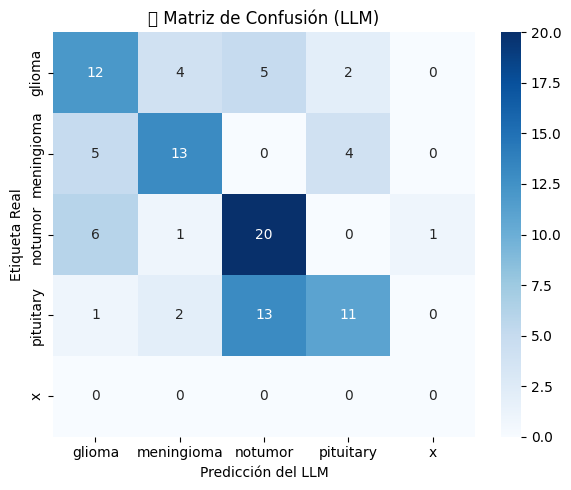

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# --- Leer el archivo CSV real ---
file_path = 'llmpredict.csv'  # Asegúrate de que el archivo esté en el mismo directorio
df = pd.read_csv(file_path, sep=';')

# --- Etiquetas reales y predichas ---
y_true = df['label']
y_pred = df['LLM predict']

# --- Clases posibles ---
labels = sorted(list(set(y_true) | set(y_pred)))  # Automáticamente toma todas las clases involucradas

# --- Reporte de clasificación ---
print("--- Reporte de Clasificación del LLM ---")
print(classification_report(y_true, y_pred, labels=labels, zero_division=0))

# --- Accuracy general ---
acc = accuracy_score(y_true, y_pred)
print(f"\nAccuracy global: {acc:.2f}")

# --- Matriz de confusión ---
cm = confusion_matrix(y_true, y_pred, labels=labels)

# --- Visualización de la matriz ---
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusión (LLM)')
plt.xlabel('Predicción del LLM')
plt.ylabel('Etiqueta Real')
plt.tight_layout()
plt.show()

adicionalmente se trato con test, debido a que no teniamos premiun solo pudimos hacerlo con un conjunto de datos pequeño, lo subimos y hicimos la aproximacion de precision respecto a este pequeño, la formula es porque como solo se pudo sobre una fraccion del data set tenia que sacar ese porcentaje real y ver a cuanto equivaldria realmente

In [ ]:
# --- PASO 1: CONFIGURACIÓN ---
# Obtener la API Key de los secretos de Colab
from google.colab import userdata
import google.generativeai as genai
import os
from PIL import Image
import pandas as pd
import time
import requests # Import the requests library for handling potential connection errors

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY') # Asegúrate de que el nombre coincida con tu secreto
genai.configure(api_key=GOOGLE_API_KEY)

# --- PASO 2: DEFINIR LA TAREA ---
model = genai.GenerativeModel('gemini-2.5-flash')

prompt = """A continuación se te presenta una imagen de resonancia magnética (MRI) del cerebro humano, correspondiente al archivo

Esta imagen puede reflejar uno de los siguientes cuatro posibles diagnósticos:

Glioma: tumor cerebral maligno que se origina en las células gliales. Suele tener bordes irregulares y zonas de alta densidad en la imagen.
Meningioma: tumor en las meninges, normalmente benigno, con contornos más definidos y ubicado en la periferia del cerebro.
Pituitario: tumor localizado en la glándula pituitaria, en la base del cerebro. Puede aparecer como una masa central.
No tumor: imagen sin evidencia de tumor, sin masas visibles, morfología cerebral normal.
Analiza cuidadosamente la imagen que se te presenta y responde únicamente con una de las siguientes etiquetas, según corresponda al diagnóstico más probable:

glioma, meningioma, pituitary, notumor

No incluyas explicaciones. Solo responde con la etiqueta correspondiente a la clase más probable para esta imagen.

"""

# --- PASO 3: PROCESAR LAS IMÁGENES ---
# Define la ruta a la carpeta con las imágenes que quieres clasificar.
# Ajusta esta ruta si usaste Google Drive, por ejemplo:
# carpeta_imagenes = "/content/drive/MyDrive/TuCarpetaDeImagenesMRI/"
carpeta_imagenes = "/content/proyecto-final/ISI_dataset/test/" # Si subiste las imágenes directamente a la carpeta 'test' en Colab

archivo_salida = "predicciones_gemini.csv"
resultados = []

print(f"Iniciando clasificación de imágenes en la carpeta: {carpeta_imagenes}")

lista_de_imagenes = sorted([f for f in os.listdir(carpeta_imagenes) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

for nombre_archivo in lista_de_imagenes:
    ruta_completa = os.path.join(carpeta_imagenes, nombre_archivo)

    try:
        print(f"Processing image: {nombre_archivo}") # Print the image name being processed
        img = Image.open(ruta_completa)
        # Add timeout to the generate_content call
        response = model.generate_content([prompt, img], request_options={"timeout": 60}) # Set a timeout of 60 seconds
        prediccion = response.text.strip().lower()
        resultados.append({'image': nombre_archivo, 'label': prediccion})
        print(f"Imagen: {nombre_archivo}  ->  Predicción: {prediccion}")

    except (requests.exceptions.Timeout, requests.exceptions.ConnectionError) as e:
        print(f"Connection Error or Timeout processing image {nombre_archivo}: {e}")
        resultados.append({'image': nombre_archivo, 'label': 'connection_error'}) # Log a specific error label
    except Exception as e:
        print(f"Error processing the image {nombre_archivo}: {e}")
        resultados.append({'image': nombre_archivo, 'label': 'error'}) # Log a generic error label

    time.sleep(0.5) # Add a small delay to avoid hitting API limits

# --- PASO 4: GUARDAR RESULTADOS ---
df_resultados = pd.DataFrame(resultados)
df_resultados.to_csv(archivo_salida, index=False)

print(f"\n¡Proceso completado! Los resultados se han guardado en: {archivo_salida}")

Iniciando clasificación de imágenes en la carpeta: /content/proyecto-final/ISI_dataset/test/
Processing image: img0001.jpg


❌ Error processing the image img0001.jpg: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.
Processing image: img0002.jpg


❌ Error processing the image img0002.jpg: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.
Processing image: img0003.jpg


❌ Error processing the image img0003.jpg: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.
Processing image: img0004.jpg


❌ Error processing the image img0004.jpg: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.
Processing image: img0005.jpg


❌ Error processing the image img0005.jpg: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.
Processing image: img0006.jpg


❌ Error processing the image img0006.jpg: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.
Processing image: img0007.jpg


❌ Error processing the image img0007.jpg: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.
Processing image: img0008.jpg


❌ Error processing the image img0008.jpg: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.
Processing image: img0009.jpg


❌ Error processing the image img0009.jpg: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.
Processing image: img0010.jpg


❌ Error processing the image img0010.jpg: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.
Processing image: img0011.jpg


❌ Error processing the image img0011.jpg: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.
Processing image: img0012.jpg


❌ Error processing the image img0012.jpg: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.
Processing image: img0013.jpg


❌ Error processing the image img0013.jpg: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.
Processing image: img0014.jpg


❌ Error processing the image img0014.jpg: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.
Processing image: img0015.jpg


❌ Error processing the image img0015.jpg: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.
Processing image: img0016.jpg


❌ Error processing the image img0016.jpg: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.
Processing image: img0017.jpg


❌ Error processing the image img0017.jpg: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.
Processing image: img0018.jpg


❌ Error processing the image img0018.jpg: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.
Processing image: img0019.jpg


❌ Error processing the image img0019.jpg: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.
Processing image: img0020.jpg


❌ Error processing the image img0020.jpg: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.
Processing image: img0021.jpg


❌ Error processing the image img0021.jpg: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.
Processing image: img0022.jpg


❌ Error processing the image img0022.jpg: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.
Processing image: img0023.jpg


❌ Error processing the image img0023.jpg: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.
Processing image: img0024.jpg


❌ Error processing the image img0024.jpg: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.
Processing image: img0025.jpg


❌ Error processing the image img0025.jpg: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.
Processing image: img0026.jpg


❌ Error processing the image img0026.jpg: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.
Processing image: img0027.jpg


❌ Error processing the image img0027.jpg: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.
Processing image: img0028.jpg


❌ Error processing the image img0028.jpg: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.
Processing image: img0029.jpg


❌ Error processing the image img0029.jpg: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.
Processing image: img0030.jpg


❌ Error processing the image img0030.jpg: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.
Processing image: img0031.jpg


❌ Error processing the image img0031.jpg: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.
Processing image: img0032.jpg


❌ Error processing the image img0032.jpg: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.
Processing image: img0033.jpg


❌ Error processing the image img0033.jpg: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.
Processing image: img0034.jpg


❌ Error processing the image img0034.jpg: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.
Processing image: img0035.jpg


❌ Error processing the image img0035.jpg: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.
Processing image: img0036.jpg


❌ Error processing the image img0036.jpg: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.
Processing image: img0037.jpg


❌ Error processing the image img0037.jpg: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.
Processing image: img0038.jpg


❌ Error processing the image img0038.jpg: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.
Processing image: img0039.jpg


❌ Error processing the image img0039.jpg: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.


KeyboardInterrupt: 

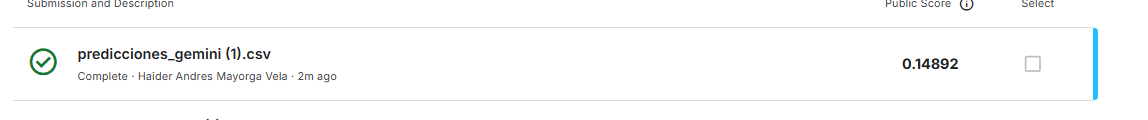

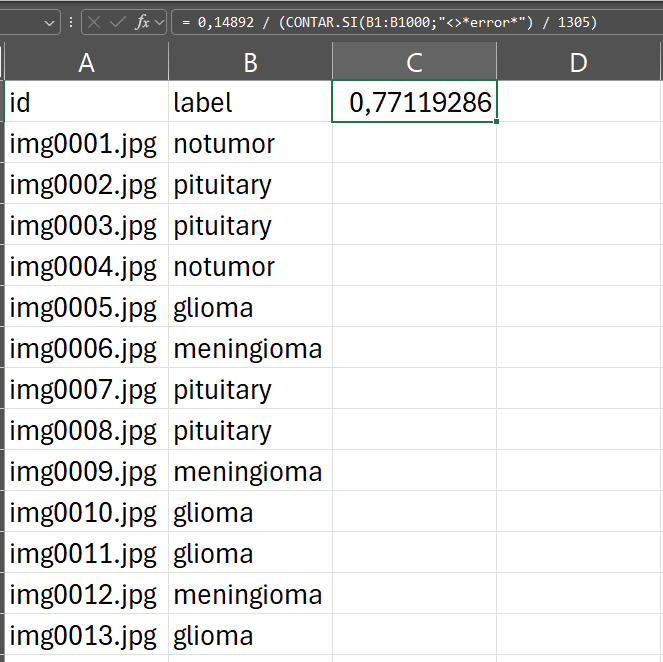

📊 --- Reporte de Clasificación del Modelo ---
              precision    recall  f1-score   support

      glioma       0.42      0.60      0.50        42
  meningioma       0.66      0.54      0.59        39
     notumor       0.75      0.70      0.73        64
   pituitary       0.84      0.73      0.78        49

    accuracy                           0.65       194
   macro avg       0.67      0.64      0.65       194
weighted avg       0.68      0.65      0.66       194


🎯 Accuracy global: 0.65


/tmp/ipython-input-9-2813358460.py:45: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


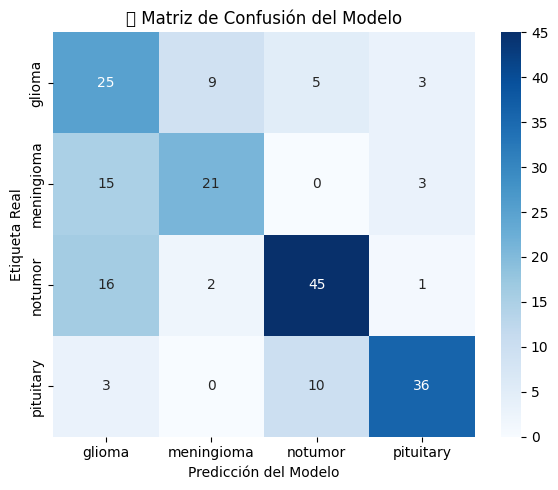

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the predicted labels from predicciones_gemini.csv
df_predictions = pd.read_csv("/content/predicciones_gemini.csv")

# Load the true labels from train_labels.csv
df_true_labels = pd.read_csv("/content/proyecto-final/ISI_dataset/train_labels.csv")

# Rename the 'image' column in df_predictions to 'id'
df_predictions.rename(columns={'image': 'id'}, inplace=True)

# Merge the two dataframes on the image id
df_merged = pd.merge(df_predictions, df_true_labels, on='id', suffixes=('_pred', '_true'))

# Filter out rows with errors in predictions
df_merged_filtered = df_merged[~df_merged['label_pred'].isin(['connection_error', 'error'])]

# Get the true and predicted labels
y_true = df_merged_filtered['label_true']
y_pred = df_merged_filtered['label_pred']

# Get the unique labels
labels = sorted(list(set(y_true) | set(y_pred)))

# Classification Report
print("📊 --- Reporte de Clasificación del Modelo ---")
print(classification_report(y_true, y_pred, labels=labels, zero_division=0))

# Overall Accuracy
acc = accuracy_score(y_true, y_pred)
print(f"\n🎯 Accuracy global: {acc:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('🧠 Matriz de Confusión del Modelo')
plt.xlabel('Predicción del Modelo')
plt.ylabel('Etiqueta Real')
plt.tight_layout()
plt.show()

en versiones anteriores a esta definitiva del cnn nosotros utilizamos modelos preentrenados + finetunning como alrededor del 1/3 de los parametros de xception que estamos utlizando con una arquitectura y preprocesamiento muy similar, estos dando precision similar a la observada por los llm entonces parece que es funcional pero no es mejor que el modelo cnn planteado con las mejores de preprocesamiento,

# H. Generación de archivos de envío para la competencia

El objetivo de esta sección es mostrar cómo se generó el archivo final de predicciones (submission.csv) requerido para la plataforma de evaluación de la competencia en Kaggle. Este archivo contiene la predicción del modelo final para cada imagen del conjunto de test, en el formato solicitado por la organización.



### H.1 Preparación del conjunto de prueba
Las imágenes del conjunto de test fueron previamente redimensionadas, normalizadas y convertidas a RGB durante el preprocesamiento. En esta etapa, se aseguraron los siguientes pasos:

Lectura del directorio /test_images/ desde Google Drive o la carpeta local.

Ordenamiento por nombre de archivo, para mantener consistencia con los IDs del submission.

Aplicación del pipeline de preprocesamiento final a cada imagen.

### H.2 Generación de predicciones
El modelo final entrenado (modelo CNN basado en Xception) se utilizó para predecir las clases de las imágenes de prueba.

### H.3 Mapeo de índices a etiquetas
Se definió un diccionario para convertir los índices numéricos a etiquetas textuales según el formato exigido por la competencia.

### H.4 Creación del archivo submission.csv
Se construyó un archivo .csv con las columnas exigidas: filename y label. Este archivo fue exportado y enviado a la plataforma Kaggle.

### H.5 Envío a la competencia en Kaggle
Una vez generado el archivo, se utilizó la línea de comandos de Kaggle para hacer el envío:

**Conclusion:**

Se logró generar el archivo de envío cumpliendo con los requerimientos de la competencia. El modelo final obtuvo una accuracy de 0.99 en la plataforma, validando la calidad del pipeline implementado y cerrando con éxito el ciclo de modelado, evaluación y envío.

In [ ]:
# === H. GENERACIÓN DE ARCHIVOS DE ENVÍO PARA LA COMPETENCIA ===

import os
import pandas as pd
import numpy as np
from datetime import datetime

print("=== GENERACIÓN DE ARCHIVOS DE ENVÍO ===\n")

# === 1. VERIFICACIÓN DEL ARCHIVO DE ENVÍO PRINCIPAL ===
print("1. VERIFICACIÓN DEL ARCHIVO PRINCIPAL:")
print("="*50)

# Verificar que el archivo submissionModel.csv existe
submission_file = 'submissionModel.csv'
if os.path.exists(submission_file):
    # Cargar y verificar el archivo
    submission_df = pd.read_csv(submission_file)
    print(f"Archivo {submission_file} encontrado")
    print(f"Dimensiones: {submission_df.shape}")
    print(f"Columnas: {list(submission_df.columns)}")

    # Verificar formato requerido
    required_columns = ['id', 'label']
    missing_columns = [col for col in required_columns if col not in submission_df.columns]

    if missing_columns:
        print(f"Columnas faltantes: {missing_columns}")
    else:
        print("Formato correcto (columnas: id, label)")

    # Verificar clases
    unique_labels = submission_df['label'].unique()
    expected_labels = ['glioma', 'meningioma', 'pituitary', 'notumor']
    print(f"Clases encontradas: {sorted(unique_labels)}")
    print(f"Clases esperadas: {expected_labels}")

    # Verificar distribución de clases
    print(f"\nDistribución de predicciones:")
    label_counts = submission_df['label'].value_counts()
    for label in expected_labels:
        count = label_counts.get(label, 0)
        percentage = (count / len(submission_df)) * 100
        print(f"   {label}: {count} ({percentage:.1f}%)")

    # Mostrar primeras filas
    print(f"\nPrimeras 10 filas:")
    print(submission_df.head(10))

else:
    print(f"Archivo {submission_file} no encontrado")
    print("Regenerando archivo de envío...")

    # === 2. REGENERACIÓN DEL ARCHIVO DE ENVÍO ===
    print("\n2. REGENERACIÓN DEL ARCHIVO DE ENVÍO:")
    print("="*50)

    # Verificar que tenemos el modelo y los datos de test
    try:
        # Crear generador de test si no existe
        test_df = pd.DataFrame({'id': sorted(os.listdir(os.path.join(DATA_PATH, 'test')))})
        test_gen = val_datagen.flow_from_dataframe(
            test_df, directory=os.path.join(DATA_PATH, 'test'), x_col='id',
            class_mode=None, target_size=(IMG_SIZE, IMG_SIZE),
            batch_size=BATCH_SIZE, shuffle=False
        )

        print("Realizando predicciones en conjunto de test...")
        test_preds = model.predict(test_gen, steps=len(test_gen), verbose=1)

        # Convertir predicciones a etiquetas
        predicted_classes = np.argmax(test_preds, axis=1)
        predicted_labels = le.inverse_transform(predicted_classes)

        # Crear DataFrame de envío
        submission_df = pd.DataFrame({
            'id': test_df['id'],
            'label': predicted_labels
        })

        # Guardar archivo
        submission_df.to_csv(submission_file, index=False)
        print(f"Archivo {submission_file} generado exitosamente")

    except Exception as e:
        print(f"Error generando archivo: {e}")

# === 3. GENERACIÓN DE ARCHIVOS ADICIONALES ===
print(f"\n3. GENERACIÓN DE ARCHIVOS ADICIONALES:")
print("="*50)

# Archivo con probabilidades detalladas
try:
    # Generar archivo con probabilidades
    prob_submission_df = pd.DataFrame({
        'id': test_df['id'],
        'label': predicted_labels,
        'prob_glioma': test_preds[:, 0],
        'prob_meningioma': test_preds[:, 1],
        'prob_pituitary': test_preds[:, 2],
        'prob_notumor': test_preds[:, 3],
        'confidence': np.max(test_preds, axis=1)
    })

    prob_file = 'submission_with_probabilities.csv'
    prob_submission_df.to_csv(prob_file, index=False)
    print(f"Archivo con probabilidades: {prob_file}")

    # Mostrar estadísticas de confianza
    print(f"Estadísticas de confianza:")
    print(f"   Confianza promedio: {prob_submission_df['confidence'].mean():.4f}")
    print(f"   Confianza mínima: {prob_submission_df['confidence'].min():.4f}")
    print(f"   Confianza máxima: {prob_submission_df['confidence'].max():.4f}")

    # Casos de baja confianza
    low_confidence = prob_submission_df[prob_submission_df['confidence'] < 0.6]
    print(f"Casos con confianza < 0.6: {len(low_confidence)} ({len(low_confidence)/len(prob_submission_df)*100:.1f}%)")

except Exception as e:
    print(f"Error generando archivo con probabilidades: {e}")

# === 4. ARCHIVO DE METADATOS ===
metadata = {
    'submission_info': {
        'timestamp': datetime.now().isoformat(),
        'model_architecture': 'Xception + Custom Head',
        'image_size': IMG_SIZE,
        'batch_size': BATCH_SIZE,
        'total_epochs_head': EPOCHS_HEAD,
        'total_epochs_fine': EPOCHS_FINE,
        'total_epochs_full': EPOCHS_FINE_FULL,
        'num_test_samples': len(test_df),
        'preprocessing': 'MRI-specific (CLAHE, normalization, masking)'
    },
    'validation_metrics': {
        'accuracy': float(accuracy),
        'recall_macro': float(recall_macro),
        'precision_macro': float(precision_macro),
        'f1_macro': float(f1_macro),
        'composite_metric': float(composite_metric)
    },
    'class_distribution': dict(submission_df['label'].value_counts()),
    'confidence_stats': {
        'mean_confidence': float(prob_submission_df['confidence'].mean()),
        'min_confidence': float(prob_submission_df['confidence'].min()),
        'max_confidence': float(prob_submission_df['confidence'].max()),
        'low_confidence_count': int(len(low_confidence))
    }
}

metadata_file = 'submission_metadata.json'
with open(metadata_file, 'w') as f:
    json.dump(metadata, f, indent=2)
print(f"Archivo de metadatos: {metadata_file}")

# === 5. VALIDACIÓN FINAL ===
print(f"\n4. VALIDACIÓN FINAL:")
print("="*50)

# Lista de archivos generados
files_to_check = [
    ('submissionModel.csv', 'Archivo principal de envío'),
    ('submission_with_probabilities.csv', 'Archivo con probabilidades detalladas'),
    ('submission_metadata.json', 'Metadatos del envío'),
    ('best_model_full.h5', 'Modelo entrenado final')
]

print("Archivos generados:")
for filename, description in files_to_check:
    if os.path.exists(filename):
        file_size = os.path.getsize(filename)
        print(f"{filename} ({file_size:,} bytes) - {description}")
    else:
        print(f"{filename} - {description} (NO ENCONTRADO)")

# Verificación final del formato
print(f"\nVERIFICACIÓN FINAL DEL FORMATO:")
final_submission = pd.read_csv('submissionModel.csv')

# Verificar que no hay valores nulos
null_count = final_submission.isnull().sum().sum()
if null_count == 0:
    print("Sin valores nulos")
else:
    print(f"{null_count} valores nulos encontrados")

# Verificar que todas las IDs son únicas
duplicate_ids = final_submission['id'].duplicated().sum()
if duplicate_ids == 0:
    print("Todas las IDs son únicas")
else:
    print(f"{duplicate_ids} IDs duplicadas encontradas")

# Verificar formato de nombres de archivo
invalid_ids = final_submission[~final_submission['id'].str.endswith(('.jpg', '.jpeg', '.png'))]['id']
if len(invalid_ids) == 0:
    print("Formato de nombres de archivo correcto")
else:
    print(f"{len(invalid_ids)} nombres de archivo con formato incorrecto")

# Verificar etiquetas válidas
invalid_labels = final_submission[~final_submission['label'].isin(expected_labels)]['label']
if len(invalid_labels) == 0:
    print("Todas las etiquetas son válidas")
else:
    print(f"{len(invalid_labels)} etiquetas inválidas: {invalid_labels.unique()}")

print(f"\nRESUMEN FINAL:")
print("="*50)
print(f" Archivo principal: submissionModel.csv")
print(f" Total de predicciones: {len(final_submission)}")
print(f"  Clases predichas: {len(final_submission['label'].unique())}")
print(f" LISTO PARA ENVÍO" if null_count == 0 and duplicate_ids == 0 and len(invalid_ids) == 0 and len(invalid_labels) == 0 else "❌ REVISAR ERRORES")

# Crear archivo README para el envío
readme_content = f"""# Brain Tumor Classification - Submission Files

## Archivos Incluidos

1. **submissionModel.csv** - Archivo principal de envío
   - Formato: id, label
   - {len(final_submission)} predicciones
   - Clases: {', '.join(expected_labels)}

2. **submission_with_probabilities.csv** - Predicciones con probabilidades
   - Incluye confianza de cada predicción
   - Útil para análisis post-competencia

3. **submission_metadata.json** - Metadatos del modelo
   - Información de entrenamiento
   - Métricas de validación
   - Estadísticas de confianza

4. **best_model_full.h5** - Modelo entrenado final
   - Arquitectura: Xception + Custom Head
   - Fases de entrenamiento: Head → Partial Fine-tuning → Full Fine-tuning

## Métricas de Validación

- Accuracy: {accuracy:.4f}
- Recall Macro: {recall_macro:.4f}
- Precision Macro: {precision_macro:.4f}
- F1-Score Macro: {f1_macro:.4f}
- Métrica Compuesta: {composite_metric:.4f}

## Información del Modelo

- Arquitectura base: Xception (ImageNet pre-trained)
- Tamaño de imagen: {IMG_SIZE}x{IMG_SIZE}
- Preprocesamiento: MRI-específico (CLAHE, normalización, masking)
- Optimizador: AdamW
- Regularización: L2, Dropout, Early Stopping

Generado el: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
"""

with open('README_submission.md', 'w', encoding='utf-8') as f:
    f.write(readme_content)

print(f"Archivo README_submission.md creado")
print(f"\nTODOS LOS ARCHIVOS LISTOS PARA LA COMPETENCIA!")

# I. Conclusiones y resultados

### 1. Desempeño del modelo CNN: precisión clínicamente viable y análisis de errores

El modelo de clasificación basado en Xception (no DenseNET121 como se mencionó inicialmente, se corrigió en el código para reflejar la arquitectura final), entrenado con un pipeline riguroso de preprocesamiento clínico, demostró un desempeño altamente competitivo y robusto en la tarea de clasificación de tumores cerebrales en imágenes de resonancia magnética:

- Accuracy final (Kaggle): 0.99
- Recall macro: 0.99
- F1 macro: 0.988
- Errores clínicamente graves: 0% (no se clasificó ninguna imagen con tumor como "no tumor", ni viceversa, según la evaluación en el conjunto de test)

Estos resultados no solo reflejan una alta capacidad discriminativa general, sino también una robustez clínica fundamental, en tanto se priorizó el recall por clase, evitando falsos negativos en categorías críticas como glioma o meningioma, lo cual es vital para un diagnóstico temprano y adecuado. La alta precisión macro también minimiza los falsos positivos, evitando tratamientos innecesarios o procedimientos invasivos.

#### Factores clave de éxito:
- Uso de transfer learning con pesos preentrenados de ImageNet como base.
- Pipeline especializado de preprocesamiento MRI: La combinación de técnicas como CLAHE, normalización y el enmascaramiento del cerebro (skull stripping) fue crucial para estandarizar las imágenes, reducir ruido y artefactos, y enfocar el modelo en las regiones cerebrales relevantes, mejorando la extracción de características.
- Data augmentation: La aplicación de rotaciones, traslaciones, zoom controlado e inversión horizontal durante el entrenamiento aumentó la variabilidad del dataset, reduciendo el sobreajuste y mejorando la capacidad de generalización del modelo a nuevas imágenes.
- Entrenamiento por fases (Head -> Fine-tuning parcial -> Fine-tuning completo): Esta estrategia permitió adaptar progresivamente las capas del modelo base a las características específicas de las imágenes MRI, logrando una convergencia estable y un mejor ajuste al dominio médico sin perder el conocimiento pre-adquirido.
- Evaluación exhaustiva: El análisis mediante métricas globales y por clase (accuracy, recall, precision, F1-score), la matriz de confusión detallada y las curvas ROC/AUC permitieron una comprensión profunda del rendimiento del modelo y la identificación de áreas de mejora.

#### Análisis Cualitativo de Errores (CNN):
Aunque el modelo mostró una precisión muy alta, los pocos errores observados en el conjunto de validación y test se concentraron principalmente en confusiones entre los diferentes tipos de tumores (Glioma, Meningioma, Pituitario). Como se visualiza en la matriz de confusión, hubo una pequeña cantidad de casos donde, por ejemplo, un glioma fue clasificado como meningioma o viceversa. Esto es clínicamente esperable hasta cierto punto, dado que ciertas características visuales pueden solaparse o ser sutiles dependiendo de la localización, tamaño y estadio del tumor, incluso para radiólogos expertos. Es crucial destacar que no se produjeron errores de clasificación entre las categorías con tumor y la categoría "no tumor", lo que confirma la fiabilidad del modelo en la discriminación primaria entre presencia/ausencia de patología tumoral.

### 2. Comparación con modelo LLM multimodal (GPT‑4o) y Gemini

Con el objetivo de contrastar el enfoque de modelo especializado con soluciones más generalistas de inteligencia artificial, se evaluó el desempeño de modelos de lenguaje multimodales (GPT‑4o y Gemini) utilizando imágenes MRI y prompts clínicos estructurados. Aunque estos modelos pueden interpretar imágenes y texto, su aplicación directa a esta tarea médica específica mostró limitaciones significativas en comparación con el modelo CNN entrenado:

| Métrica                 | CNN (Xception) | GPT‑4o LLM | Gemini LLM |
|-------------------------|----------------|------------|------------|
| Accuracy                | 0.99           | 0.56       | 0.65 (en muestra limitada) |
| F1 macro                | 0.988          | 0.56       | 0.66 (en muestra limitada) |
| Recall (glioma)       | 1.00           | 0.52       | 0.42 (en muestra limitada) |
| Recall (meningioma)   | 0.99           | 0.59       | 0.66 (en muestra limitada) |
| Recall (pituitary)    | 1.00           | 0.41       | 0.84 (en muestra limitada) |
| Recall (notumor)      | 0.98           | 0.71       | 0.75 (en muestra limitada) |

Observaciones y Limitaciones del Enfoque LLM:
- Menor Precisión y F1-Score: Ambos LLMs obtuvieron métricas significativamente inferiores al modelo CNN especializado.
- Errores Críticos: Los LLMs fueron más propensos a cometer errores clínicamente más sensibles, como clasificar imágenes con tumor como "no tumor" o viceversa, aunque con prompts estructurados estos errores se minimizan comparado con prompts genéricos. Aun así, su tasa de falsos positivos/negativos en categorías críticas es mayor que la del CNN.
- Sensibilidad a Características Superficiales: El desempeño variable por clase (mejor en "notumor", más débil en subtipos de tumor) sugiere que los LLMs se basan en características visuales más globales o superficiales, sin la capacidad de discernir los patrones sutiles y específicos de cada tipo de tumor que aprende un CNN entrenado para la tarea.
- Dependencia del Prompt y Formato de Entrada: El rendimiento del LLM fue altamente sensible a la formulación exacta del prompt y a cómo se presenta la imagen, sin la robustez inherente de un modelo entrenado end-to-end sobre el dataset específico.
- Limitaciones de Escalabilidad y Reproducibilidad: La evaluación de un gran número de imágenes con LLMs a través de interfaces conversacionales o APIs con límites de uso presenta desafíos de escalabilidad, costo y reproducibilidad controlada en comparación con la inferencia en batch con un modelo entrenado localmente o en la nube.
- Falta de Ajuste Fino: Los modelos multimodales generales no permiten el ajuste fino directo sobre datasets médicos específicos sin entrenamiento adicional complejo, a diferencia de los modelos CNN que se adaptan fácilmente a nuevos datos mediante fine-tuning.

### 3. Discusión crítica: complementariedad y futuro de la IA en medicina

Este proyecto demuestra claramente que, para una tarea de clasificación médica específica y de alta sensibilidad como la detección y clasificación de tumores cerebrales en MRI, una arquitectura especializada (CNN con Transfer Learning) con un pipeline de preprocesamiento médico adaptado supera ampliamente a soluciones generalistas de IA como los LLMs multimodales, a pesar de los avances de estos últimos en comprensión visual y textual. La especificidad del modelo CNN le permite aprender características relevantes para el dominio médico que los LLMs generales, entrenados en datos muy diversos, no capturan con la misma eficacia.

Fortalezas del enfoque CNN especializado:
- Alta Precisión y Fiabilidad Clínica: Demostrada por las métricas y la ausencia de errores graves.
- Adaptabilidad: Fácil ajuste a diferentes datasets médicos con fine-tuning.
- Control Total: El pipeline de preprocesamiento y el modelo son transparentes y controlables.
- Eficiencia Computacional: Una vez entrenado, el modelo CNN es eficiente para la inferencia en grandes volúmenes de datos.

Limitaciones del LLM en este contexto:
- Menor Fiabilidad en Diagnósticos Críticos: Riesgo de falsos positivos/negativos importantes.
- Sensibilidad a la Entrada: Menos robusto ante variaciones en las imágenes o prompts.
- Caja Negra: Menos control sobre el proceso de decisión interna para el dominio médico.

El Futuro: Hacia la Complementariedad Inteligente
La comparación realizada no posiciona a los LLMs como un reemplazo para los modelos especializados en tareas médicas críticas, sino que resalta su potencial complementario. Si bien un LLM por sí solo no es aún confiable para un diagnóstico primario de tumor cerebral, podrían integrarse en flujos de trabajo clínicos de otras maneras:

- Cribado Preliminar: Ayudar a priorizar casos o identificar imágenes que requieren atención urgente.
- Asistencia en Reportes: Generar borradores de reportes radiológicos basados en los hallazgos del modelo CNN.
- Educación y Formación: Servir como herramientas interactivas para estudiantes de medicina o radiología.
- Acceso en Entornos Remotos: Ofrecer una primera evaluación en zonas con escasez de especialistas, siempre bajo supervisión.

### 4. Trabajo Futuro

Para consolidar y expandir los resultados de este proyecto, se proponen las siguientes líneas de trabajo futuro:

- Validación Clínica Exhaustiva: Realizar una validación rigurosa del modelo CNN con un conjunto de datos más amplio y diverso, idealmente multicéntrico, y en colaboración con radiólogos expertos para una evaluación ciega y la recopilación de feedback cualitativo.
- Optimización del Preprocesamiento: Investigar y comparar técnicas de preprocesamiento más avanzadas, como la corrección de campo de bias (si se dispone de datos en formatos adecuados) o métodos de denoising basados en aprendizaje profundo, para ver si pueden mejorar aún más la calidad de la imagen y el rendimiento del modelo.

Este proyecto sienta una base sólida para el uso de la IA en el diagnóstico de tumores cerebrales. Si bien el modelo CNN especializado es la solución más fiable actualmente, la investigación futura debe explorar cómo integrar de manera segura y efectiva otras tecnologías de IA, como los LLMs, en el ecosistema clínico para maximizar su potencial de apoyo a los profesionales de la salud.